***Table Of Contents***

**1. Preparing The Data For Analysis**

    1.1 Importing Libraries and Reading Data into a Dataframe
    1.2 Basic Column Name cleaning and Observing the contents of data frame
    1.3 Dealing With Null Values
    
**2. Merging Relevant Columns of Previous Data**

    2.1 Analyse Columns of Previous Data
    
**3. Outlier Analysis of Numerical Data** :
    
    3.1 Variable Identification
    3.2 Outlier Decision
    3.2.1 Variables and Reasoning for Outliers not being dropped
    3.2.2 Variables To Be Dropped
    3.2.3 Variables with Outlier Values to be Dropped
    
**4. Univariate And Multivariate Analysis**
    
    4.1 Check Data Imbalance
    4.2 Categorical Data Analysis
    4.3 Numerical Variable Analysis
    4.4 Correlation Heatmap by Target
    4.5 Top 10 correlations

**5. Insights Obtained from EDA:**

    5.1 Categorical Variables:
    5.2 Numeric Variables:
    5.3 Insights From Correlation

**1. Preparing The Data For Analysis**

**1.1 Importing Libraries and Reading Data into a Dataframe**

In [255]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [256]:
import warnings 
warnings.simplefilter('ignore')

In [257]:
apdata = pd.read_csv("application_data.csv")
prevdata = pd.read_csv("previous_application.csv")

**1.2 Basic Column Name cleaning and Observing the contents of data frame**

In [258]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
names = apdata.columns
names = [x.lower() for x in names]
apdata.columns = names

In [259]:
apdata.shape

(307511, 122)

In [260]:
apdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, sk_id_curr to amt_req_credit_bureau_year
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [261]:
apdata.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [262]:
apdata.describe()

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,totalarea_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

**Observations** : 

1.) The dataset contains 307511 rows and 122 columns.

2.) The 122 variables contain categorical as well as numeric variables.

3.) Null values are present in quite a few columns. Null values must be dealt with first.

**1.3 Dealing With Null Values**

In [263]:
apdata.isna().sum().sort_values(ascending = False)

commonarea_medi                 214865
commonarea_avg                  214865
commonarea_mode                 214865
nonlivingapartments_mode        213514
nonlivingapartments_medi        213514
nonlivingapartments_avg         213514
fondkapremont_mode              210295
livingapartments_medi           210199
livingapartments_mode           210199
livingapartments_avg            210199
floorsmin_medi                  208642
floorsmin_mode                  208642
floorsmin_avg                   208642
years_build_medi                204488
years_build_avg                 204488
years_build_mode                204488
own_car_age                     202929
landarea_mode                   182590
landarea_avg                    182590
landarea_medi                   182590
basementarea_medi               179943
basementarea_avg                179943
basementarea_mode               179943
ext_source_1                    173378
nonlivingarea_medi              169682
nonlivingarea_avg        

In [264]:
apdata.isna().sum()/len(apdata)

sk_id_curr                      0.000000
target                          0.000000
name_contract_type              0.000000
code_gender                     0.000000
flag_own_car                    0.000000
flag_own_realty                 0.000000
cnt_children                    0.000000
amt_income_total                0.000000
amt_credit                      0.000000
amt_annuity                     0.000039
amt_goods_price                 0.000904
name_type_suite                 0.004201
name_income_type                0.000000
name_education_type             0.000000
name_family_status              0.000000
name_housing_type               0.000000
region_population_relative      0.000000
days_birth                      0.000000
days_employed                   0.000000
days_registration               0.000000
days_id_publish                 0.000000
own_car_age                     0.659908
flag_mobil                      0.000000
flag_emp_phone                  0.000000
flag_work_phone 

**Observations :**
1.) All the columns relating to the Apartment details feature in the columns with the highest Null Values.
2.) All these columns have atleast 47% missing values.

**Action Point :**
All columns with 47% or higher missing values need to be dropped from the analysis.

In [265]:
cols = apdata.columns
dropcols = [i for i in cols if apdata[i].isnull().sum() > len(apdata)*.47]

In [266]:
apdata.drop(dropcols,axis = 1,inplace = True)

In [267]:
apdata.shape

(307511, 73)

In [268]:
apdata.isnull().sum().sort_values(ascending = False)

occupation_type                96391
ext_source_3                   60965
amt_req_credit_bureau_year     41519
amt_req_credit_bureau_mon      41519
amt_req_credit_bureau_week     41519
amt_req_credit_bureau_day      41519
amt_req_credit_bureau_hour     41519
amt_req_credit_bureau_qrt      41519
name_type_suite                 1292
obs_30_cnt_social_circle        1021
def_30_cnt_social_circle        1021
obs_60_cnt_social_circle        1021
def_60_cnt_social_circle        1021
ext_source_2                     660
amt_goods_price                  278
amt_annuity                       12
cnt_fam_members                    2
days_last_phone_change             1
name_income_type                   0
flag_own_realty                    0
target                             0
flag_email                         0
flag_phone                         0
flag_cont_mobile                   0
name_contract_type                 0
flag_work_phone                    0
flag_emp_phone                     0
f

**Variable : Occupation Type**

From the data dictionary, there are two variables which are related to occupation type - organiation_type and name_income type.
We need to check if any insight can be found to impute missing values of occupation type from these variables.

In [269]:
apdata[apdata.occupation_type.isnull()][["name_income_type","organization_type"]].describe()

,name_income_type,organization_type
count,96391,96391
unique,8,58
top,Pensioner,XNA
freq,55357,55372


**Observation** : Though the column organization_type does not seem to have missing values, there is a category XNA with 55372 entries having value 'XNA'. 
A similar number of enteries in the name_income_type column has entries named 'Pensioner.' It can be deduced, that pensioners are not entered as having an organization or occupation.

**Action Point** : All null enteries in organization_type and occupation_type with the entry 'Pensioner' in the occupation_type can be categorized as a new column - 'Retired'. The Other 'XNA' values in organization_type can be categorized as Null values.

In [270]:
apdata.occupation_type.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: occupation_type, dtype: int64

In [271]:
apdata.loc[(apdata["name_income_type"] == "Pensioner"), "occupation_type"] = apdata.loc[(apdata["name_income_type"] == "Pensioner"), "occupation_type"].replace(np.nan,"Retired")

In [272]:
apdata.loc[(apdata["name_income_type"] == "Pensioner"), "organization_type"] = apdata.loc[(apdata["name_income_type"] == "Pensioner"), "organization_type"].replace("XNA","Retired")

In [273]:
apdata.organization_type.replace("XNA", np.nan,inplace = True)

**Action Point** :Since the highest occupation category is 'Labourers', it is unwise to fill all the missing data with this value (mode). Also, since the blank rows of occupation type are high, we introduce a new category 'Unknown' for this missing data.

In [274]:
apdata.occupation_type.fillna("Unknown", inplace = True)

In [275]:
apdata.organization_type.fillna("Unknown", inplace = True)

In [276]:
apdata.isnull().sum().sort_values(ascending = False)

ext_source_3                   60965
amt_req_credit_bureau_year     41519
amt_req_credit_bureau_mon      41519
amt_req_credit_bureau_week     41519
amt_req_credit_bureau_day      41519
amt_req_credit_bureau_hour     41519
amt_req_credit_bureau_qrt      41519
name_type_suite                 1292
obs_30_cnt_social_circle        1021
def_30_cnt_social_circle        1021
obs_60_cnt_social_circle        1021
def_60_cnt_social_circle        1021
ext_source_2                     660
amt_goods_price                  278
amt_annuity                       12
cnt_fam_members                    2
days_last_phone_change             1
amt_credit                         0
flag_own_car                       0
occupation_type                    0
flag_email                         0
flag_phone                         0
flag_cont_mobile                   0
target                             0
flag_work_phone                    0
flag_emp_phone                     0
flag_mobil                         0
n

**Variable : ext_source_3** :
Being a numeric variable, we will look at the spread of available data and decide the best method to impute values.

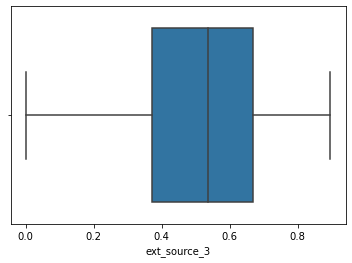

In [277]:
sns.boxplot(apdata.ext_source_3)

In [278]:
apdata.ext_source_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: ext_source_3, dtype: float64

**Action Point** : Since the spread seems uniform and the mean and median are fairly close, we choose the mean as a fair measure to impute missing values

In [279]:
apdata.ext_source_3.fillna(apdata.ext_source_3.mean(),inplace = True)

**Variables : name_credit_bureau_x** :
These five variables have numeric data. We need to check the spread for each.

In [280]:
apdata[["amt_req_credit_bureau_year","amt_req_credit_bureau_mon","amt_req_credit_bureau_week","amt_req_credit_bureau_day","amt_req_credit_bureau_hour","amt_req_credit_bureau_qrt"]].describe()

,amt_req_credit_bureau_year,amt_req_credit_bureau_mon,amt_req_credit_bureau_week,amt_req_credit_bureau_day,amt_req_credit_bureau_hour,amt_req_credit_bureau_qrt
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.267395,0.034362,0.007000,0.006402,0.265474
std,1.869295,0.916002,0.204685,0.110757,0.083849,0.794056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,27.000000,8.000000,9.000000,4.000000,261.000000


**Action Point** : For all variables, except amt_req_credit_bureau_year, 75% of the values are 0 and the non-zero ones are outlier data points. Hence, we drop these columns and retain only 1 column.

In [281]:
apdata.drop(["amt_req_credit_bureau_mon","amt_req_credit_bureau_week","amt_req_credit_bureau_day","amt_req_credit_bureau_hour","amt_req_credit_bureau_qrt"],axis = 1,inplace = True)

In [282]:
apdata["amt_req_credit_bureau_year"].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: amt_req_credit_bureau_year, dtype: int64

**Action Point** : Considering the spread of the integer data type, we consider median to be the appropriate fill value.

In [283]:
apdata["amt_req_credit_bureau_year"].fillna(apdata.amt_req_credit_bureau_year.median(),inplace = True)

**Variable** : name_type_suite : As a categorical variable, we need to study the spread across categories.

In [284]:
apdata.name_type_suite.value_counts(normalize = True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: name_type_suite, dtype: float64

**Action Point** : Since 81% of the values belong to one category, we replace missing values with the same category.

In [285]:
apdata["name_type_suite"].fillna("Unaccompanied",inplace = True)

In [286]:
apdata[["def_60_cnt_social_circle","def_30_cnt_social_circle","obs_60_cnt_social_circle","obs_30_cnt_social_circle"]].describe()

,def_60_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,obs_30_cnt_social_circle
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,0.100049,0.143421,1.405292,1.422245
std,0.362291,0.446698,2.379803,2.400989
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,2.000000,2.000000
max,24.000000,34.000000,344.000000,348.000000


More than 50% of all 4 variables are 0. Hence, we replace missing values with 0

In [287]:
apdata.def_60_cnt_social_circle.fillna(0,inplace = True)
apdata.obs_60_cnt_social_circle.fillna(0,inplace = True)
apdata.def_30_cnt_social_circle.fillna(0,inplace = True)
apdata.obs_30_cnt_social_circle.fillna(0,inplace = True)

In [288]:
apdata["ext_source_2"].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: ext_source_2, dtype: float64

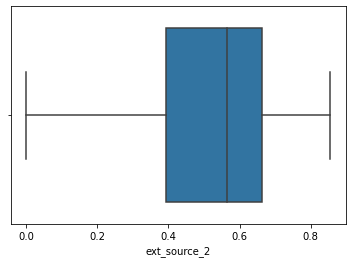

In [289]:
sns.boxplot(apdata["ext_source_2"])

**Action Point:** Since the distribution is fairly normal, we use mean to impute the missing values.

In [290]:
apdata.ext_source_2.fillna(apdata.ext_source_2.mean(),inplace = True)

In [291]:
apdata.isna().sum().sort_values(ascending = False)

amt_goods_price                278
amt_annuity                     12
cnt_fam_members                  2
days_last_phone_change           1
amt_req_credit_bureau_year       0
days_registration                0
days_id_publish                  0
flag_mobil                       0
flag_emp_phone                   0
flag_work_phone                  0
days_birth                       0
flag_cont_mobile                 0
flag_phone                       0
flag_email                       0
occupation_type                  0
region_rating_client             0
region_rating_client_w_city      0
days_employed                    0
region_population_relative       0
hour_appr_process_start          0
name_housing_type                0
name_family_status               0
name_education_type              0
name_income_type                 0
name_type_suite                  0
amt_credit                       0
amt_income_total                 0
cnt_children                     0
flag_own_realty     

**Variable:amt_goods_price** : From the data dictionary, there is another variable which seems to be linked with this one - amt_credit

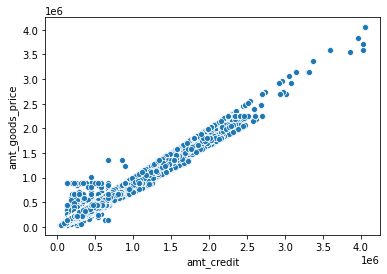

In [292]:
sns.scatterplot(apdata.amt_credit,apdata.amt_goods_price)

**Action Point** : Since the relation between the variable is almost linear, we use the values of amt_credit to impute missing values of amt_goods_price.

In [293]:
apdata.amt_goods_price.mean()

538396.2074288895

In [294]:
apdata.amt_credit.mean()

599025.9997057016

In [295]:
fillratio = apdata.amt_goods_price.mean()/apdata.amt_credit.mean()

In [296]:
apdata.amt_goods_price = np.where(apdata.amt_goods_price.isnull(), apdata.amt_credit*fillratio, apdata.amt_goods_price)

In [297]:
apdata.isna().sum().sort_values(ascending = False)

amt_annuity                    12
cnt_fam_members                 2
days_last_phone_change          1
amt_req_credit_bureau_year      0
flag_work_phone                 0
days_registration               0
days_id_publish                 0
flag_mobil                      0
flag_emp_phone                  0
flag_cont_mobile                0
days_birth                      0
flag_phone                      0
flag_email                      0
occupation_type                 0
region_rating_client            0
region_rating_client_w_city     0
days_employed                   0
region_population_relative      0
hour_appr_process_start         0
name_housing_type               0
name_family_status              0
name_education_type             0
name_income_type                0
name_type_suite                 0
amt_goods_price                 0
amt_credit                      0
amt_income_total                0
cnt_children                    0
flag_own_realty                 0
flag_own_car  

**Action Point:** : Amt_annuity also has a fairly uniform distribution. Hence we impute values using mean.

In [298]:
apdata.amt_annuity.fillna(apdata.amt_annuity.mean(),inplace = True)

**Action Point:** : The remaining variables with null values have very few rows compared to the dataset. Hence we drop these rows.

Apart from this, the column code_gender has values 'XNA' in 4 rows. Since this is not logical, we turn them into Na and drop these rows.

In [299]:
apdata.code_gender.value_counts()

F      202448
M      105059
XNA         4
Name: code_gender, dtype: int64

In [300]:
apdata['code_gender'].replace('XNA',np.nan,inplace = True)
apdata.dropna(inplace = True)

In [301]:
apdata.isna().sum().sort_values(ascending = False)

amt_req_credit_bureau_year     0
flag_cont_mobile               0
days_employed                  0
days_registration              0
days_id_publish                0
flag_mobil                     0
flag_emp_phone                 0
flag_work_phone                0
flag_phone                     0
flag_document_21               0
flag_email                     0
occupation_type                0
cnt_fam_members                0
region_rating_client           0
region_rating_client_w_city    0
weekday_appr_process_start     0
days_birth                     0
region_population_relative     0
name_housing_type              0
name_family_status             0
name_education_type            0
name_income_type               0
name_type_suite                0
amt_goods_price                0
amt_annuity                    0
amt_credit                     0
amt_income_total               0
cnt_children                   0
flag_own_realty                0
flag_own_car                   0
code_gende

***Data Is Free Of Null Values***

In [302]:
apdata['days_birth'] = apdata['days_birth']*-1
apdata['days_employed'] = apdata['days_employed']*-1
apdata['days_registration'] = apdata['days_registration']*-1
apdata['days_id_publish'] = apdata['days_id_publish']*-1
apdata['days_last_phone_change'] = apdata['days_last_phone_change']*-1

In [303]:
apdata.shape

(307504, 68)

**2. Merging Relevant Columns of Previous Data**

**2.1 Analyse Columns of Previous Data** : First, we look at the description of the data available in the previous data file and select relevant data.

In [304]:
prevdata.shape

(1670214, 37)

In [305]:
prevdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [306]:
prevdata.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [307]:
prevdata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


**Observations** : Looking at the availablilty of data and the head of data, the following observations are made.
1. The data contains 1670214 columns with duplicate entries for multiple previous loans.
2. The data contained in the variables related to details of previous loan applications. This is not relevant to current target variable.
3. The only variable relevant to current target is the outcomes of previous applications. We could try to correlate it to current loan outcome.

**Action Point** : We group the relevant variable by current SKU and merge with our main data.

In [308]:
prevdata['Count'] = 1
prevpivot = pd.pivot_table(data = prevdata,index = "SK_ID_CURR",columns = "NAME_CONTRACT_STATUS",values = "Count",aggfunc = 'sum')
prevpivot.fillna(0,inplace = True)
apdata = apdata.merge(prevpivot,how="left",left_on = "sk_id_curr",right_on = "SK_ID_CURR",suffixes = (None,None))
apdata.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_year,Approved,Canceled,Refused,Unused offer
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,5.0,3.0,1.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,6.0,0.0,0.0,0.0


**3. Outlier Analysis of Numerical Data** :

**3.1 Variable Identification**

To begin outlier analysis, we first need to seperate the categorical and numerical variables. Certain categorical variables like flag variables are coded as numberic. Hence, we need to seperate them as categorical.

In [309]:
other_cats = ["code_gender","region_rating_client","region_rating_client_w_city","reg_region_not_live_region", "reg_region_not_work_region", "live_region_not_work_region","reg_city_not_live_city","reg_city_not_work_city","live_city_not_work_city"]
for i in other_cats :
    apdata[i] = apdata[i].astype('category')
flag_col = [x for x in apdata.columns if 'flag' in x]
for i in flag_col :
    apdata[i] = apdata[i].astype('category')
cat_col = list(set(apdata.columns) - set(apdata.describe().columns))
num_col = list(apdata.describe().columns)
print("Categorical Variables", "\n", cat_col)
print("Numerical Variables","\n", num_col)  

Categorical Variables 
 ['flag_document_18', 'flag_document_5', 'flag_document_11', 'flag_document_3', 'flag_document_16', 'flag_document_13', 'flag_cont_mobile', 'flag_document_14', 'flag_document_17', 'flag_mobil', 'flag_document_19', 'reg_region_not_live_region', 'organization_type', 'reg_region_not_work_region', 'flag_document_20', 'code_gender', 'flag_document_12', 'name_family_status', 'flag_document_7', 'occupation_type', 'flag_own_realty', 'live_city_not_work_city', 'flag_own_car', 'name_contract_type', 'flag_phone', 'region_rating_client_w_city', 'flag_document_21', 'reg_city_not_work_city', 'weekday_appr_process_start', 'reg_city_not_live_city', 'flag_work_phone', 'flag_document_15', 'name_income_type', 'name_housing_type', 'flag_document_2', 'flag_email', 'flag_document_6', 'flag_document_4', 'flag_emp_phone', 'flag_document_8', 'name_education_type', 'flag_document_9', 'name_type_suite', 'region_rating_client', 'flag_document_10', 'live_region_not_work_region']
Numerical Va

**4.2 Plotting Spread of Numerical Variable** :

We now plot the spread of all numeric variables and check the presence of outliers in each variable.

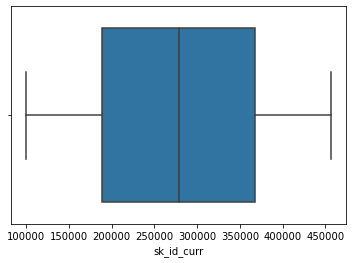

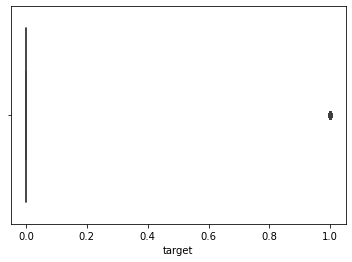

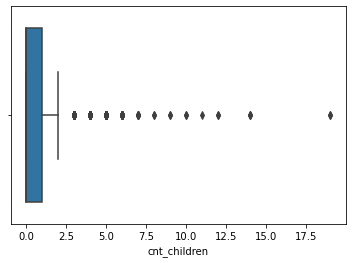

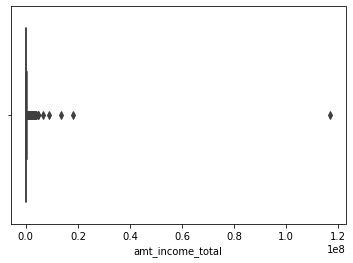

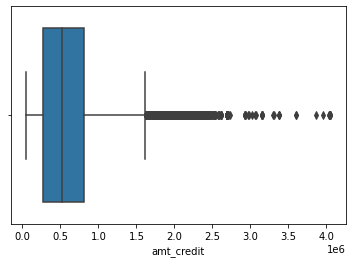

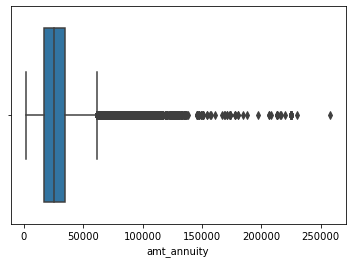

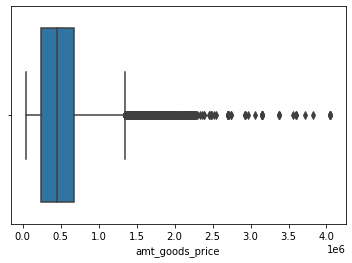

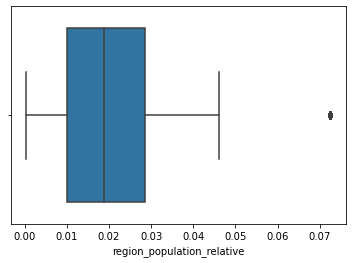

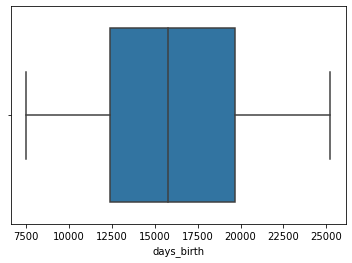

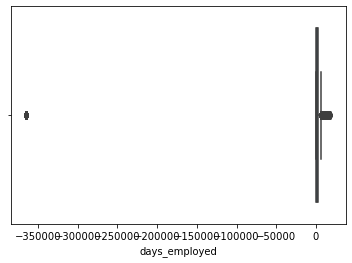

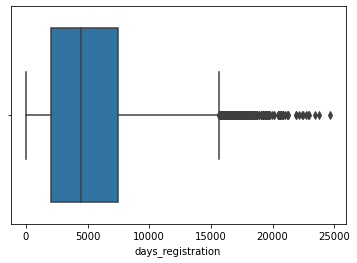

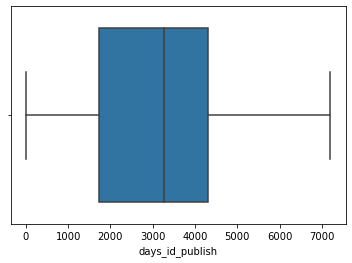

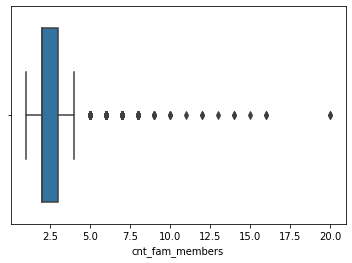

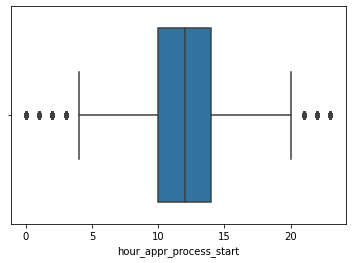

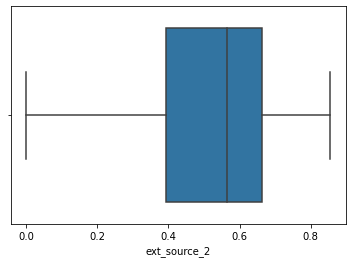

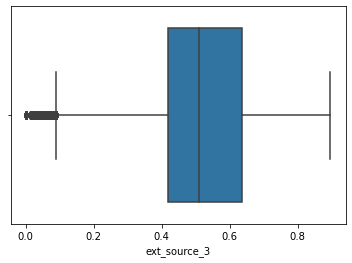

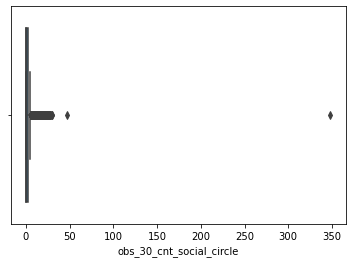

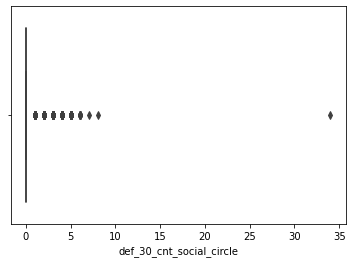

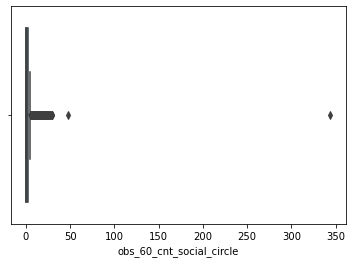

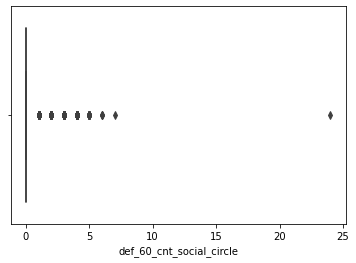

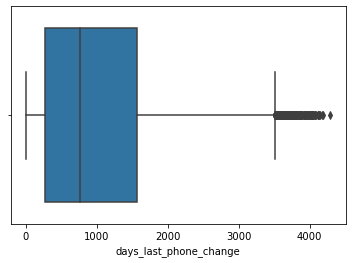

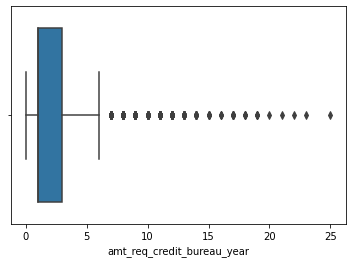

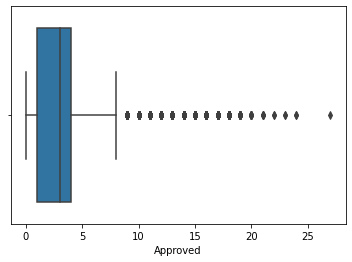

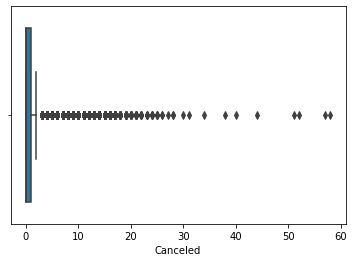

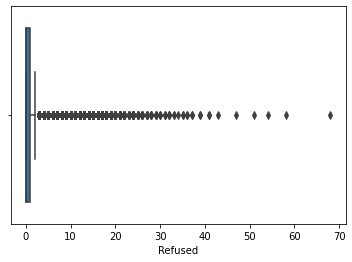

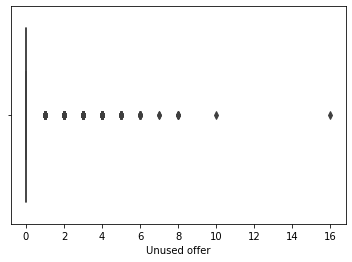

In [310]:
for column in num_col :
    sns.boxplot(apdata[column])
    plt.show()

**3.2 Outlier Decision** : Based on the plots, we now decide further course of action for all outliers.

**3.2.1 Variables and Reasoning for Outliers not being dropped**

1.) cnt_children and cnt_family_members : While the probability of no. of children being above 10 is unlikely, it is not impossible. Also, the number of such instances is low.(can be deduced by value_counts). Hence, values are retained. Similar is the case with family members.

2.) amt_credit, amt_annuity, amt_goods_price : The outlier represent HNI or goods with high values. They are not outliers and should be retained.

3.) Days_registration : The outlier values do not seem to be too far from the distribution to be wrong data. Hence, they are retained.

4.) ext_source_3 : The lower outliers represent individuals with very low credit rating. Dropping them could be very risky.

**3.2.2 Variables To Be Dropped**

def_30_social_circle and def_60_social_circle have most of the values as 0 and the rest as outliers. Hence these variables need to be dropped.

In [311]:
apdata.drop(["def_30_cnt_social_circle","def_60_cnt_social_circle"],axis = 1,inplace = True)

**3.2.3 Variables with Outlier Values to be Dropped**:
1.) amt_income_total : While the outliers closer to the distribution represent HNI, the highest value outlier is farther from 
the distribtion and may have a skewing effect. Besides, the occupation of the high earning outlier is mentioned as 'Labourer' which is highly unlikely. Hence, it is dropped.

2.) Similar reasoning is applied to obs_30_cnt_social_circle and obs_60_cnt_social_circle to drop only higher outliers.

3.) hour_appr_process_start and days_employed : The values of outliers seem illogical (working hours of bank and negative employed days). Hence, they are dropped.

4.) region_population_relative : The outlier values are far removed from the distribution. Hence, They are removed.

5.) amt_req_credit_bureau_year : Higher number of enquiries could be suspicious in nature. Hence, it is necessary for analysis.

Before removing these outliers, we do a final check to see the number of rows that are removed.

In [312]:
apdata.shape

(307504, 70)

In [313]:
print(len(apdata[apdata.amt_income_total > 1*(10**8)]))
print(len(apdata[apdata.obs_30_cnt_social_circle > 40]))
print(len(apdata[apdata.obs_60_cnt_social_circle > 40]))
print(len(apdata[(apdata.days_employed < 0)]))
print(len(apdata[(apdata.hour_appr_process_start > 21)]))
print(len(apdata[(apdata.hour_appr_process_start < 5)]))
print(len(apdata[apdata.region_population_relative > 0.06]))

1
2
2
55374
191
3751
8412


Two Columns have high number of outlier data. 

1. region_population_relative : Since there are around 5000 observations of a similar range, we decide against dropping those values.
2. Days Employed : Since a high number of rows have negative days employed, we investigate further.

Rest of the columns are dropped.

In [314]:
apdata = apdata[apdata.amt_income_total < 1*(10**8)]
apdata = apdata[apdata.obs_60_cnt_social_circle <= 40]
apdata = apdata[(apdata.hour_appr_process_start <= 21)]
apdata = apdata[(apdata.hour_appr_process_start >= 5)]

In [315]:
apdata[apdata.days_employed < 0].name_income_type.value_counts()

Pensioner     54714
Unemployed       22
Name: name_income_type, dtype: int64

The negative data is for Unemployed/Pensioner categoried. Hence, it makes sense to be negative. Hence, it cannot be dropped.
However, it is important to filter out theses categories while analyzing the days_employed as a numeric variable.

Outlier elimination is complete.

Now, we look at the final shape of the column and proceed with the analysis.

In [316]:
apdata.shape

(303559, 70)

Since a couple of columns were dropped during outlier analysis, we again split the revised apdata data set into categorical and numerical.

In [317]:
num_col.remove("def_30_cnt_social_circle")
num_col.remove("def_60_cnt_social_circle")
num_col.remove("sk_id_curr")
print(cat_col)
print(num_col)  

['flag_document_18', 'flag_document_5', 'flag_document_11', 'flag_document_3', 'flag_document_16', 'flag_document_13', 'flag_cont_mobile', 'flag_document_14', 'flag_document_17', 'flag_mobil', 'flag_document_19', 'reg_region_not_live_region', 'organization_type', 'reg_region_not_work_region', 'flag_document_20', 'code_gender', 'flag_document_12', 'name_family_status', 'flag_document_7', 'occupation_type', 'flag_own_realty', 'live_city_not_work_city', 'flag_own_car', 'name_contract_type', 'flag_phone', 'region_rating_client_w_city', 'flag_document_21', 'reg_city_not_work_city', 'weekday_appr_process_start', 'reg_city_not_live_city', 'flag_work_phone', 'flag_document_15', 'name_income_type', 'name_housing_type', 'flag_document_2', 'flag_email', 'flag_document_6', 'flag_document_4', 'flag_emp_phone', 'flag_document_8', 'name_education_type', 'flag_document_9', 'name_type_suite', 'region_rating_client', 'flag_document_10', 'live_region_not_work_region']
['target', 'cnt_children', 'amt_inco

**4. Univariate And Multivariate Analysis**

**4.1 Check Data Imbalance** : We check whether the target variable is balanced or not.

In [318]:
apdata.target.value_counts(normalize = True)

0    0.919353
1    0.080647
Name: target, dtype: float64

Since 91.9% of the data belongs to 1 category, the data is imbalanced. Hence, we seperate it into two datasets.

In [319]:
train1 = apdata[apdata.target == 1]
train0 = apdata[apdata.target == 0]

**4.2 Categorical Data Analysis** :
We define the function plotting to plot 3 charts for each categorical data.
Chart 1 : Univariate Analysis - Provides the split of variable among its categories.
Chart 2 & 3 : Bivariate Analysis - Provides the split of target variable as per the various categories in absolutes as well as percentage.

In [320]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'target', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

Plotting  flag_document_18


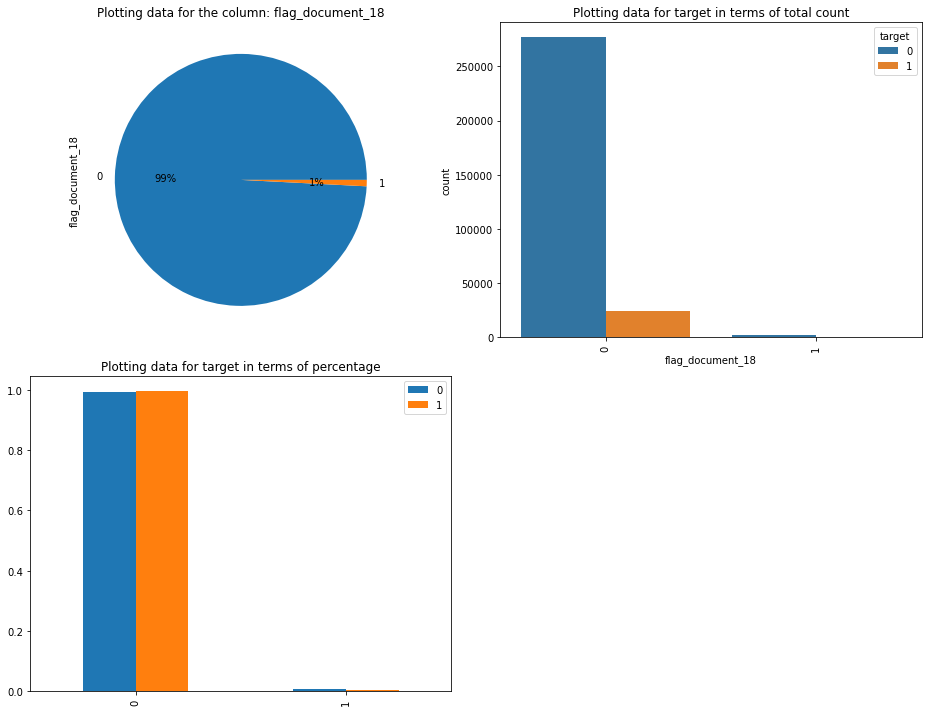

Plotting  flag_document_5


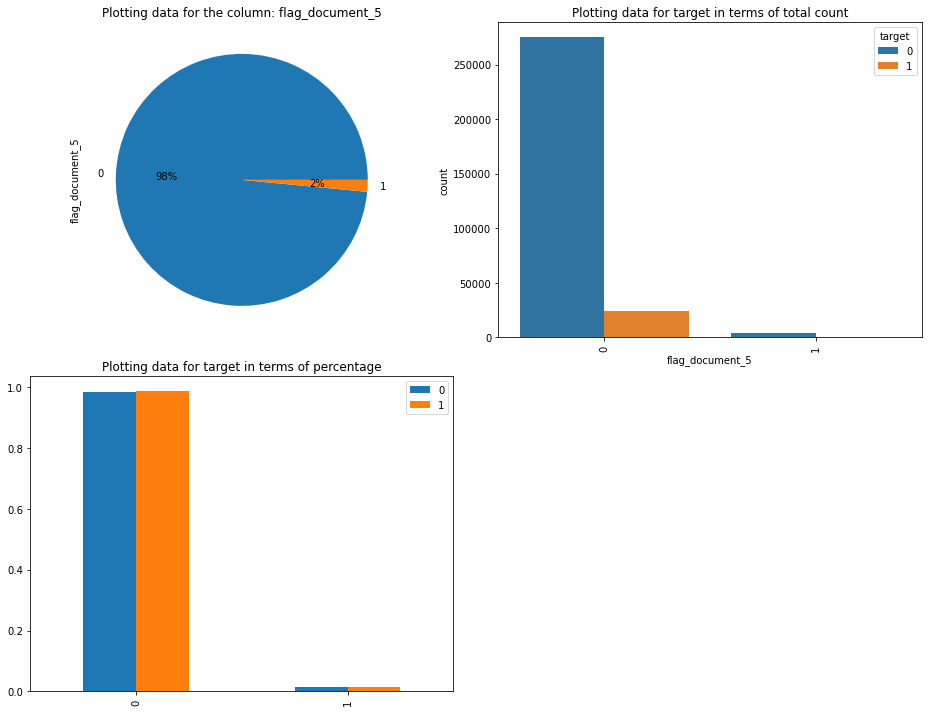

Plotting  flag_document_11


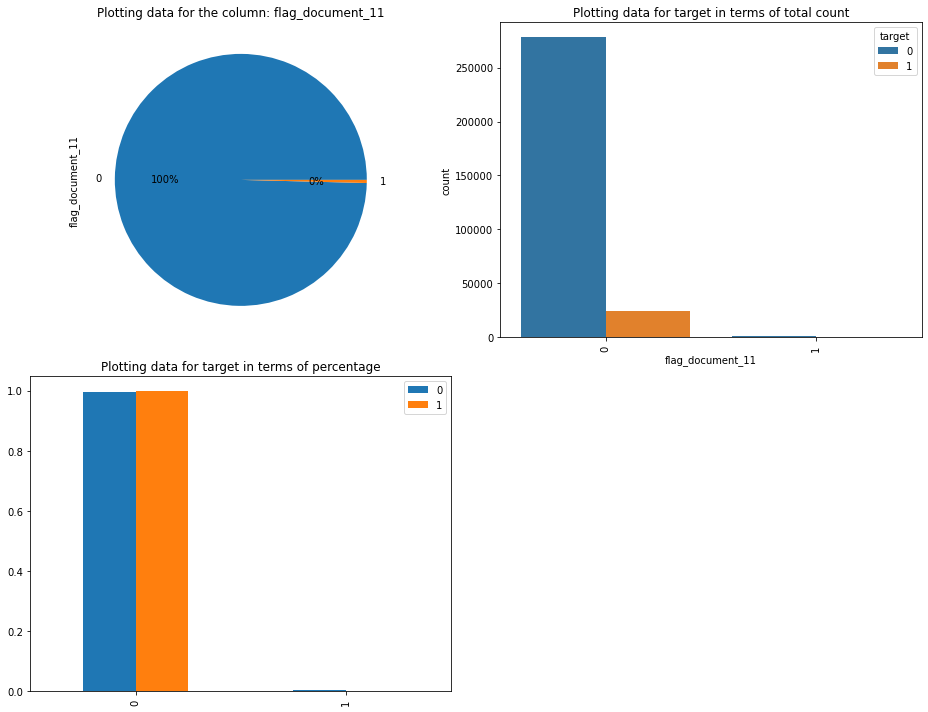

Plotting  flag_document_3


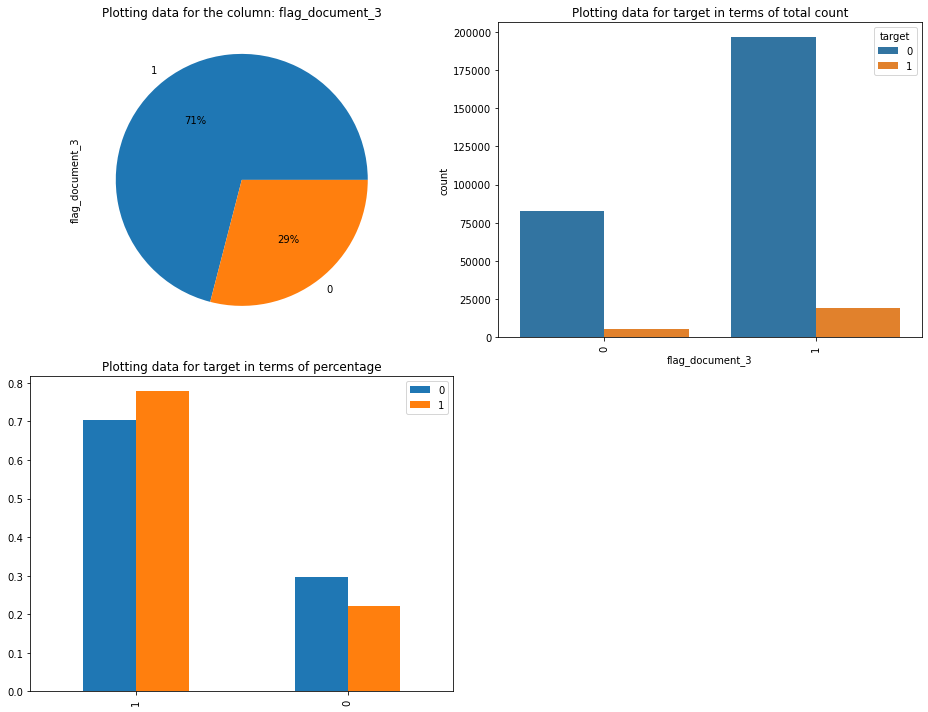

Plotting  flag_document_16


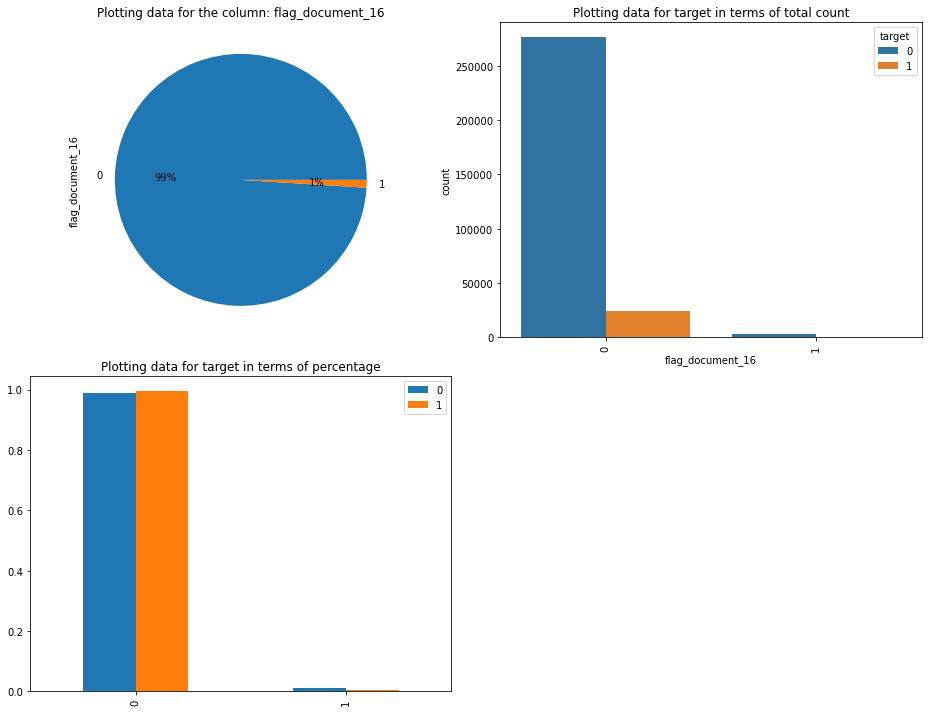

Plotting  flag_document_13


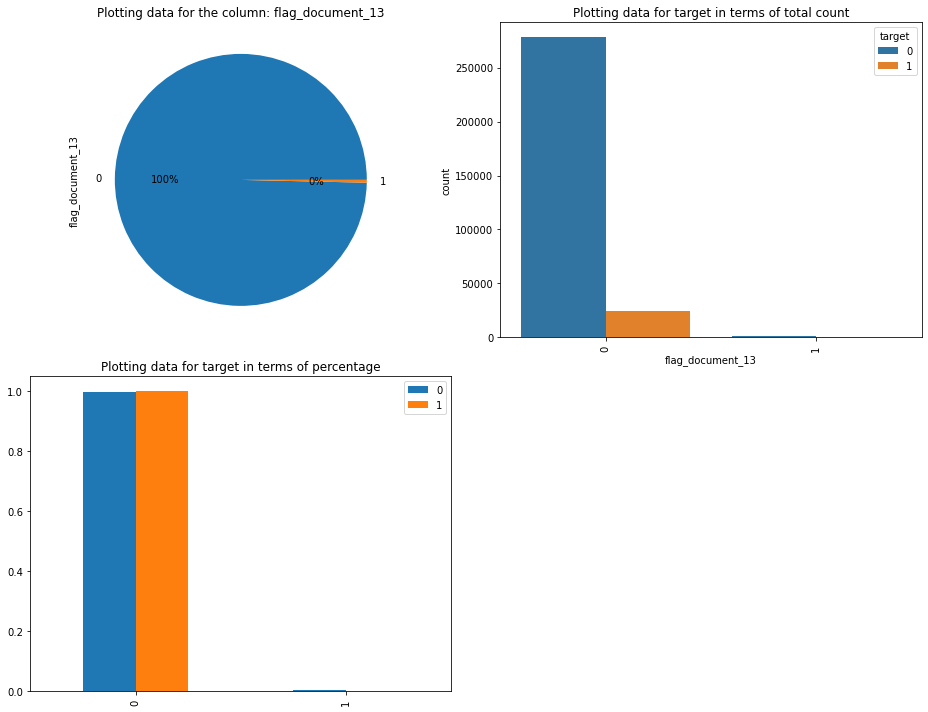

Plotting  flag_cont_mobile


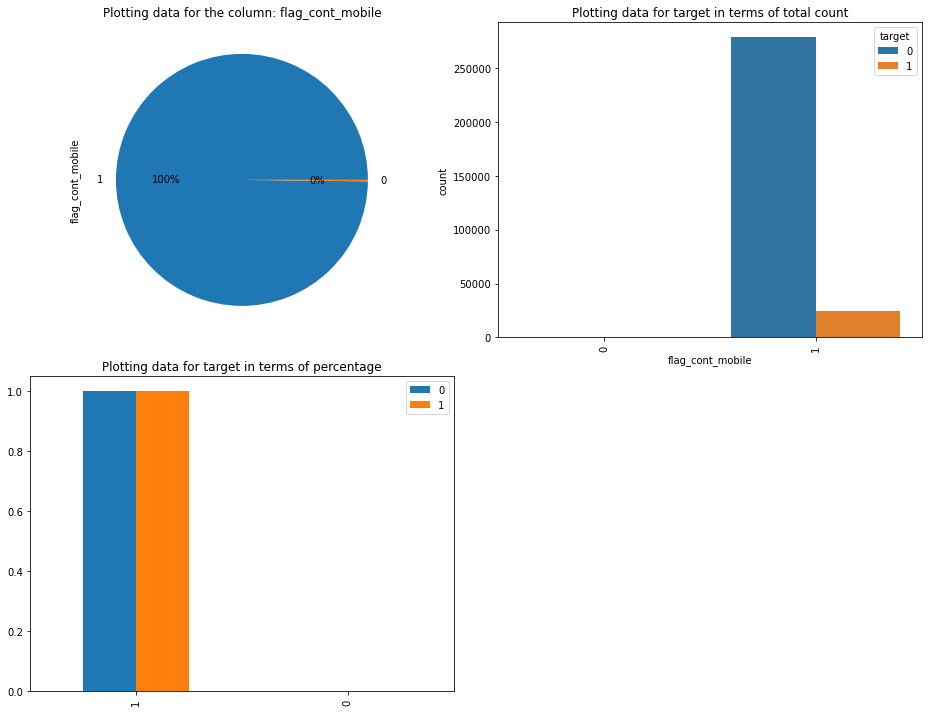

Plotting  flag_document_14


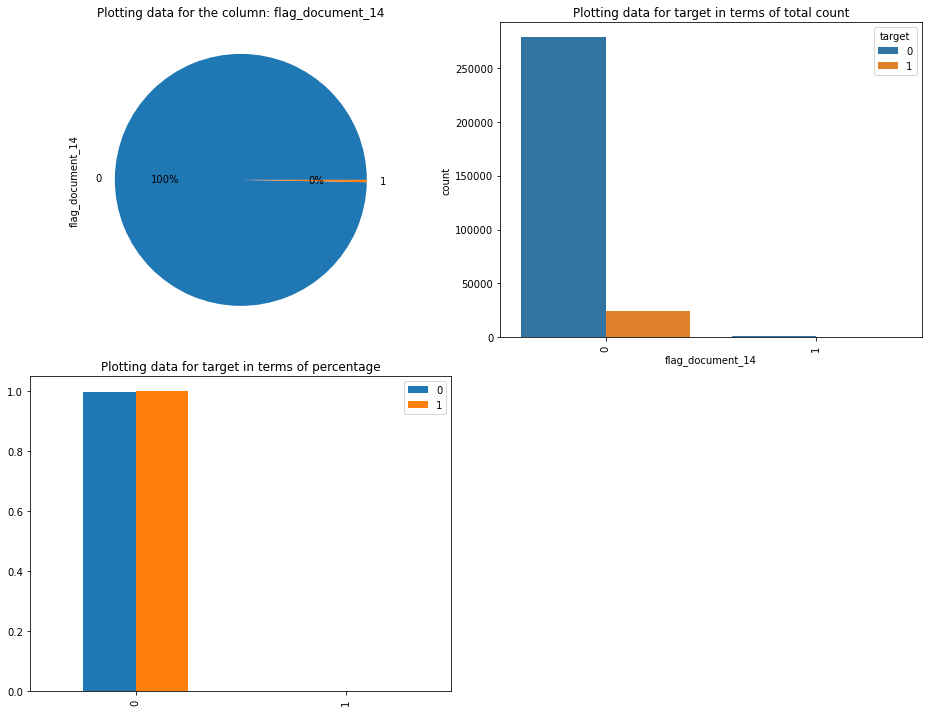

Plotting  flag_document_17


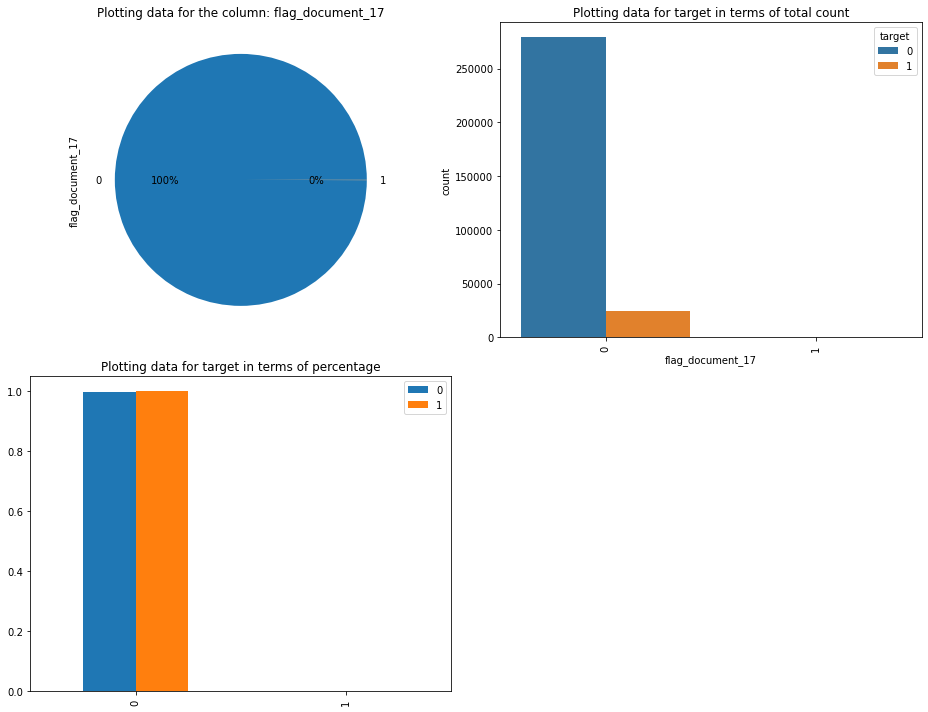

Plotting  flag_mobil


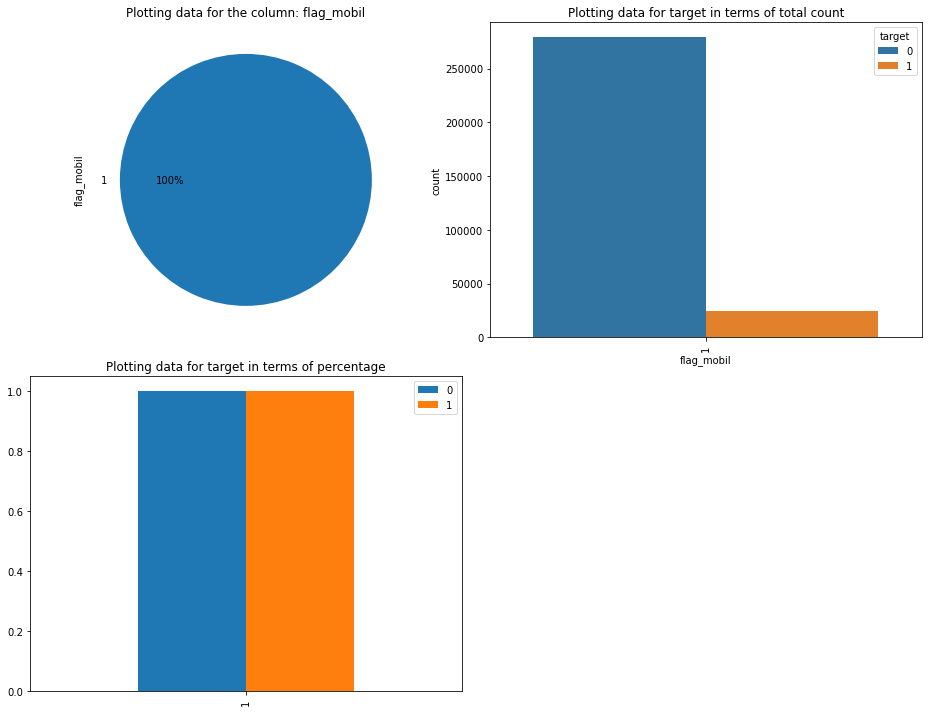

Plotting  flag_document_19


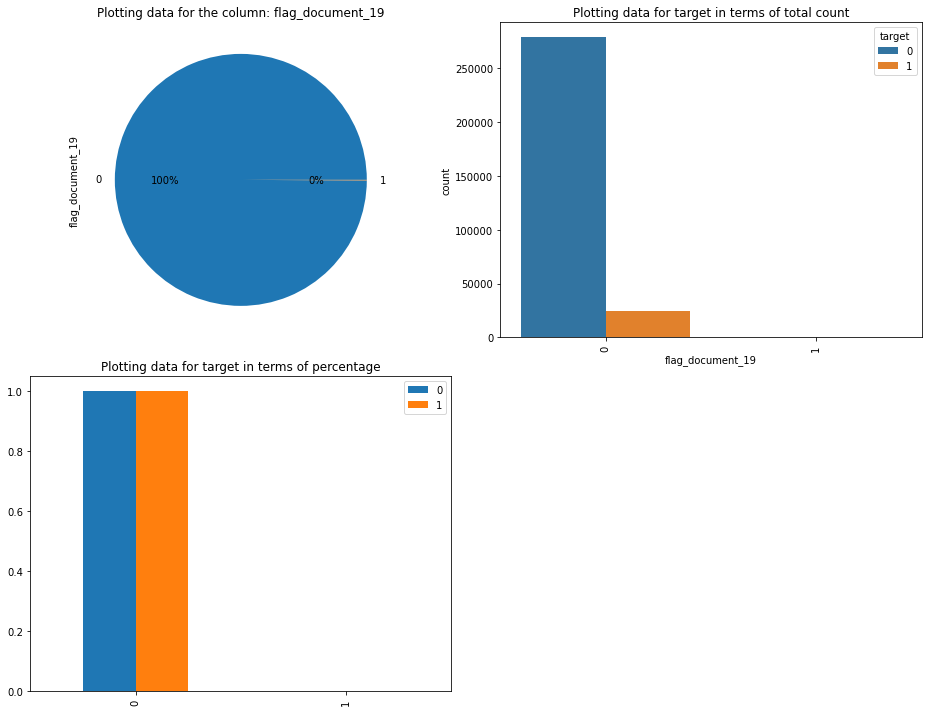

Plotting  reg_region_not_live_region


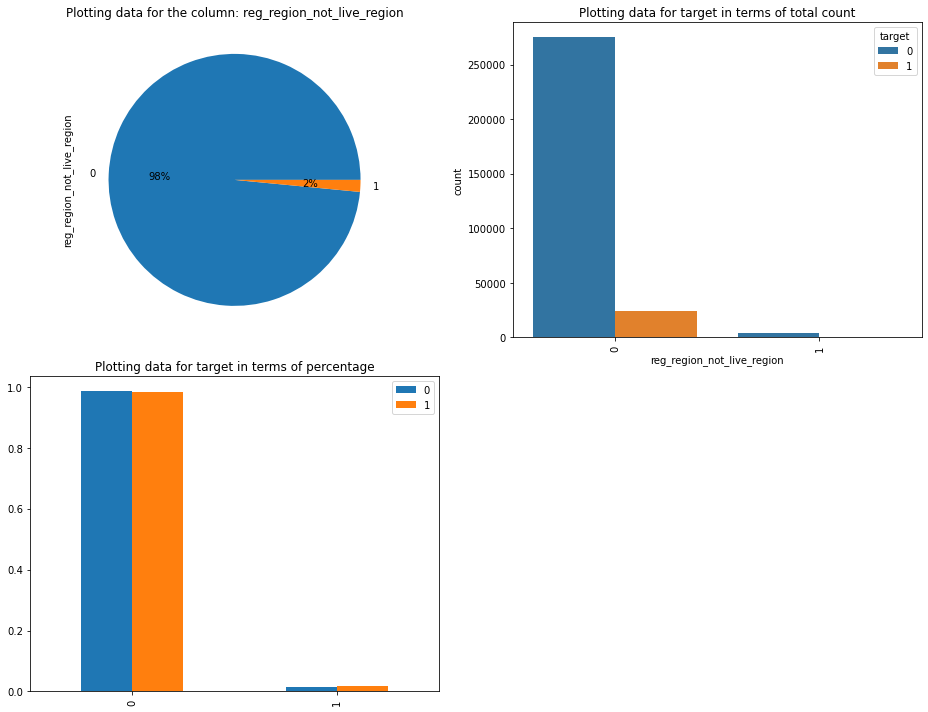

Plotting  organization_type


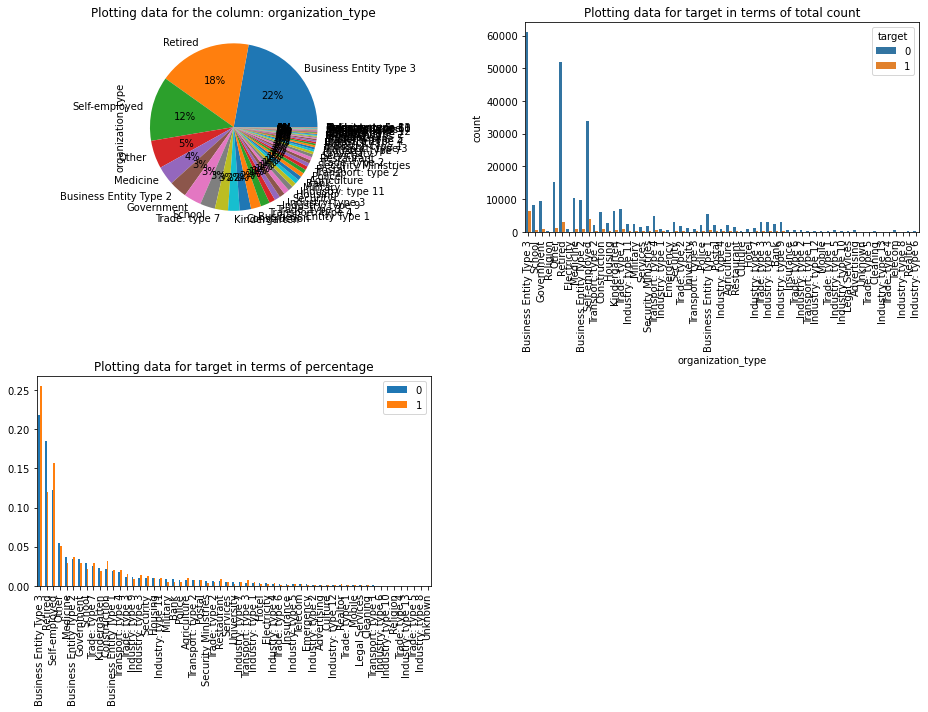

Plotting  reg_region_not_work_region


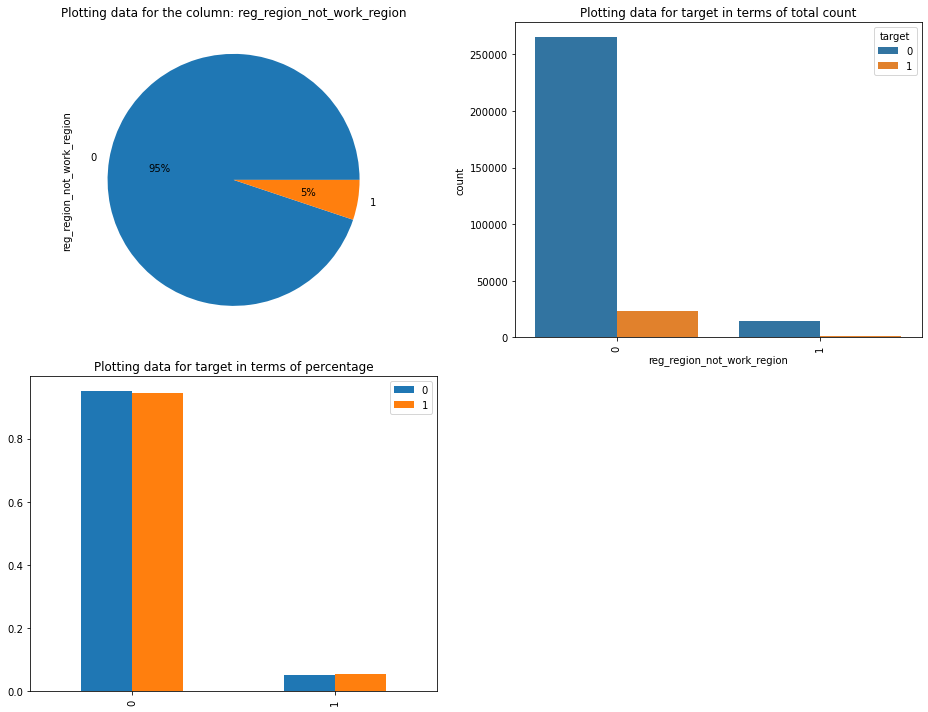

Plotting  flag_document_20


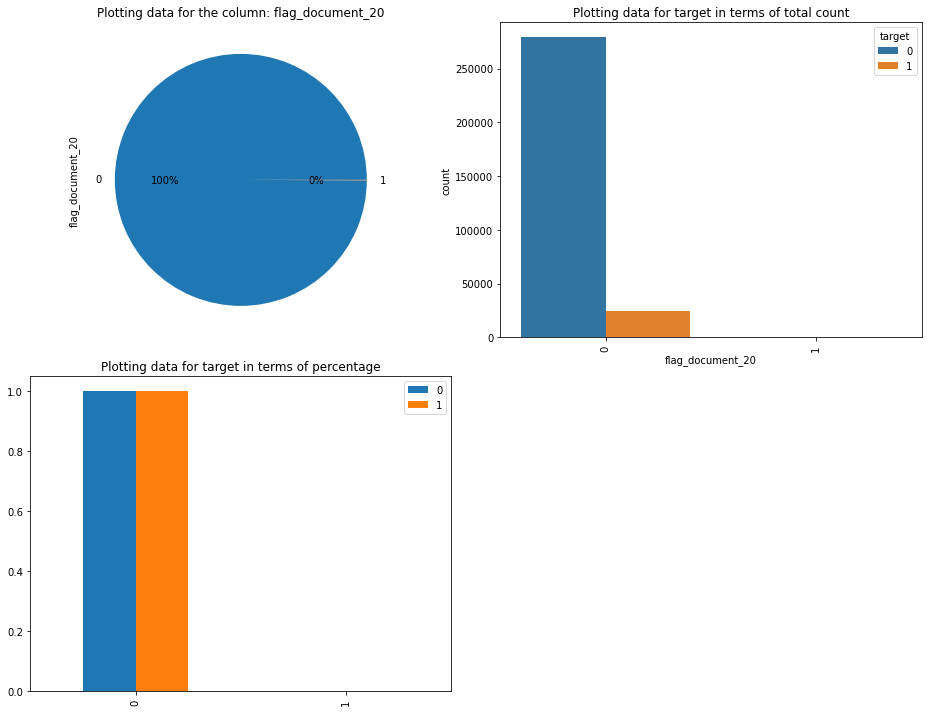

Plotting  code_gender


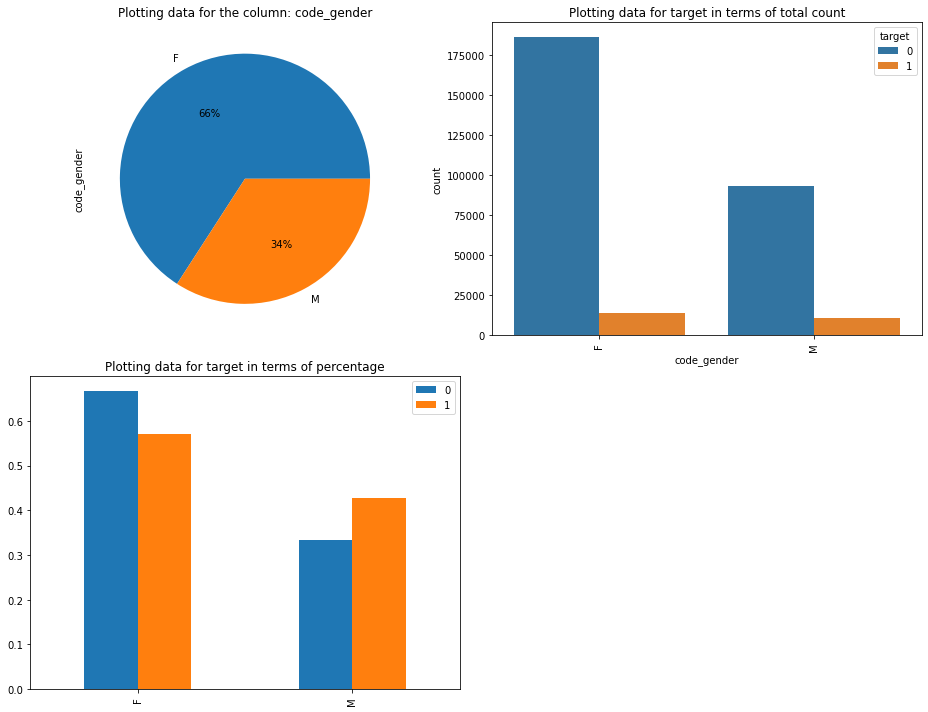

Plotting  flag_document_12


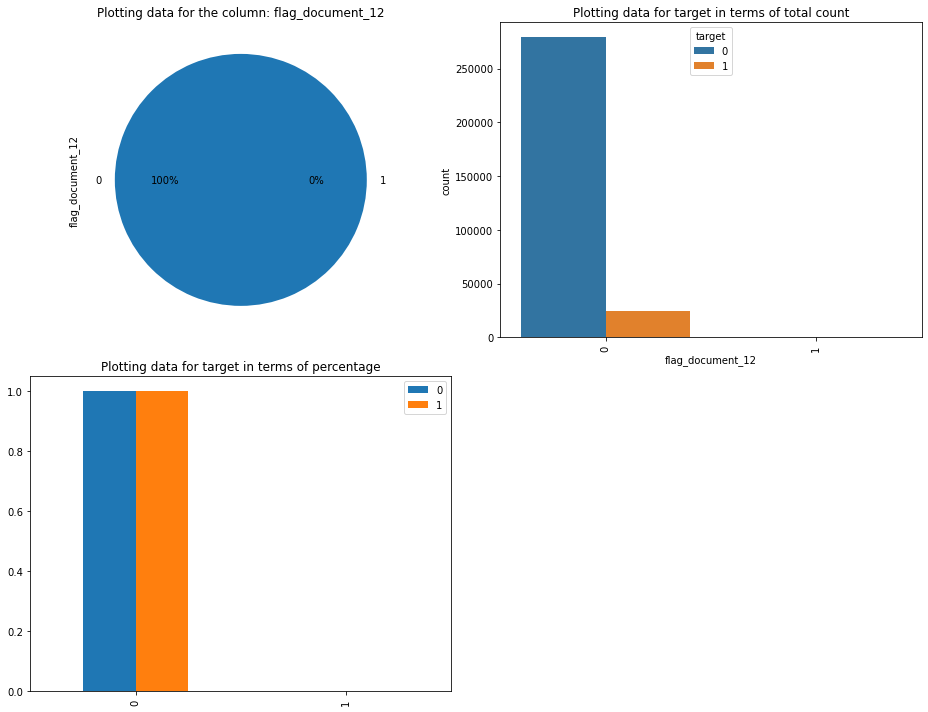

Plotting  name_family_status


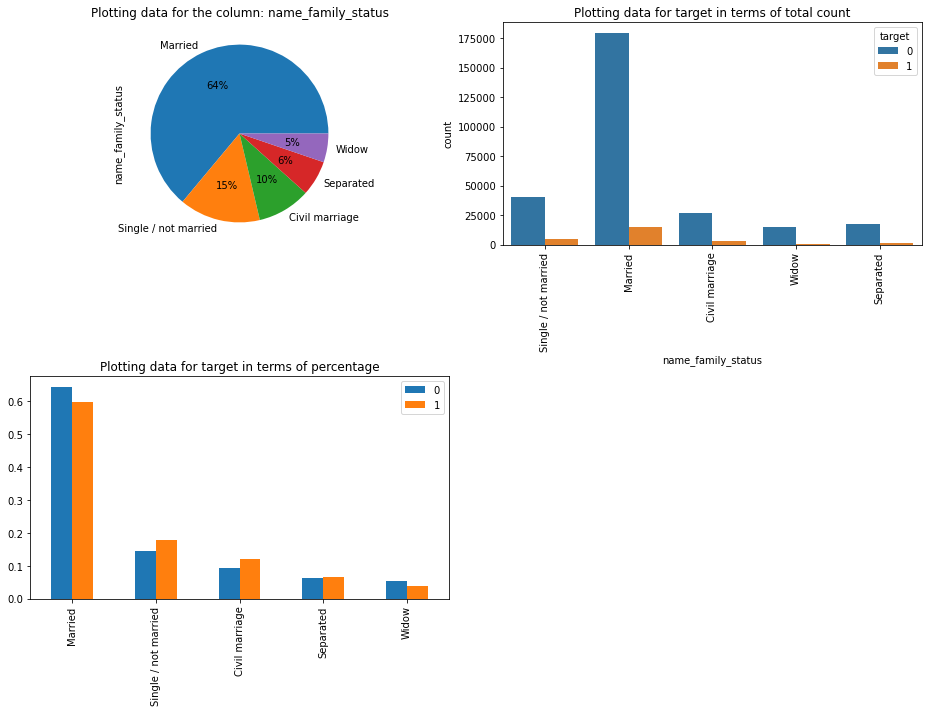

Plotting  flag_document_7


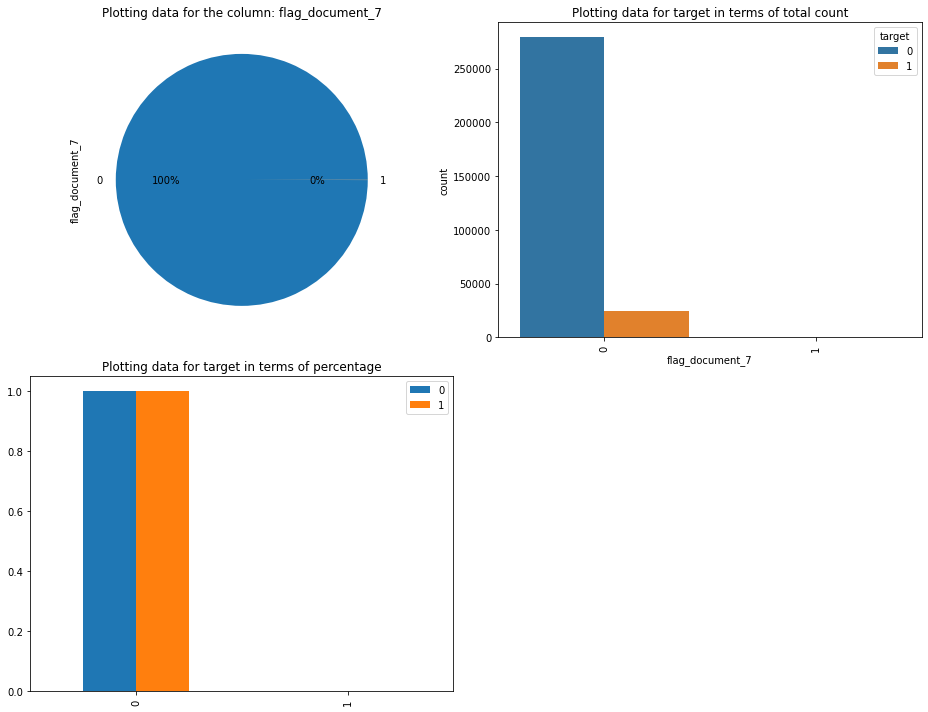

Plotting  occupation_type


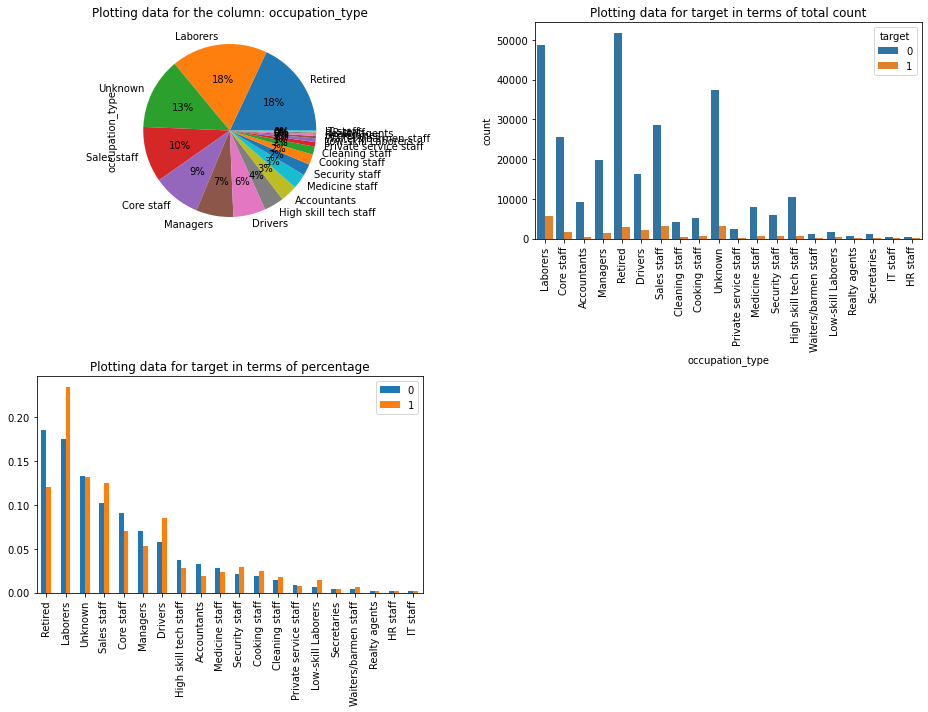

Plotting  flag_own_realty


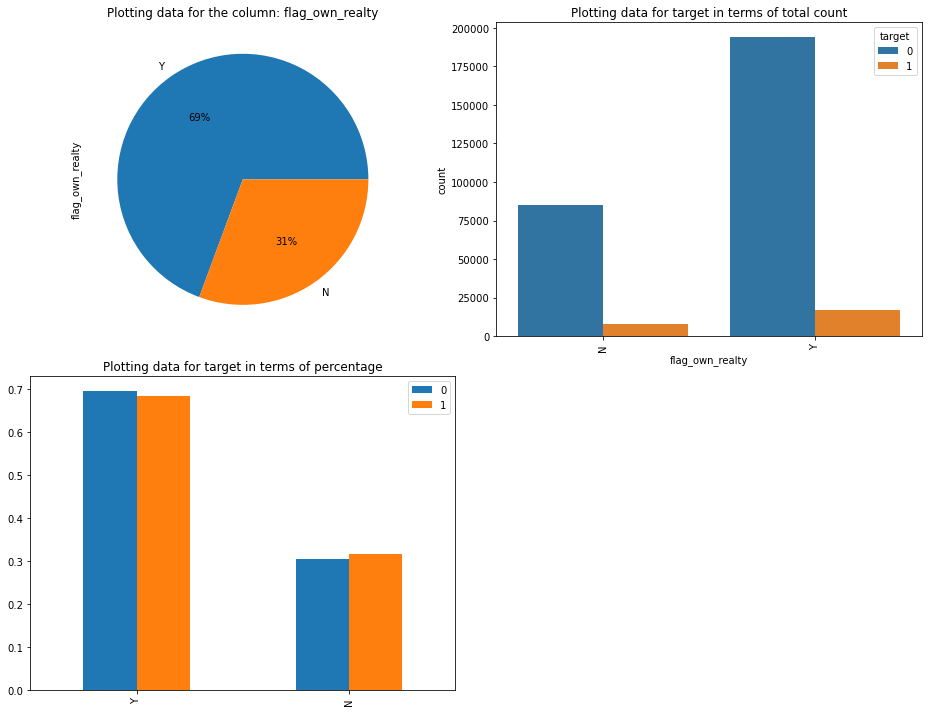

Plotting  live_city_not_work_city


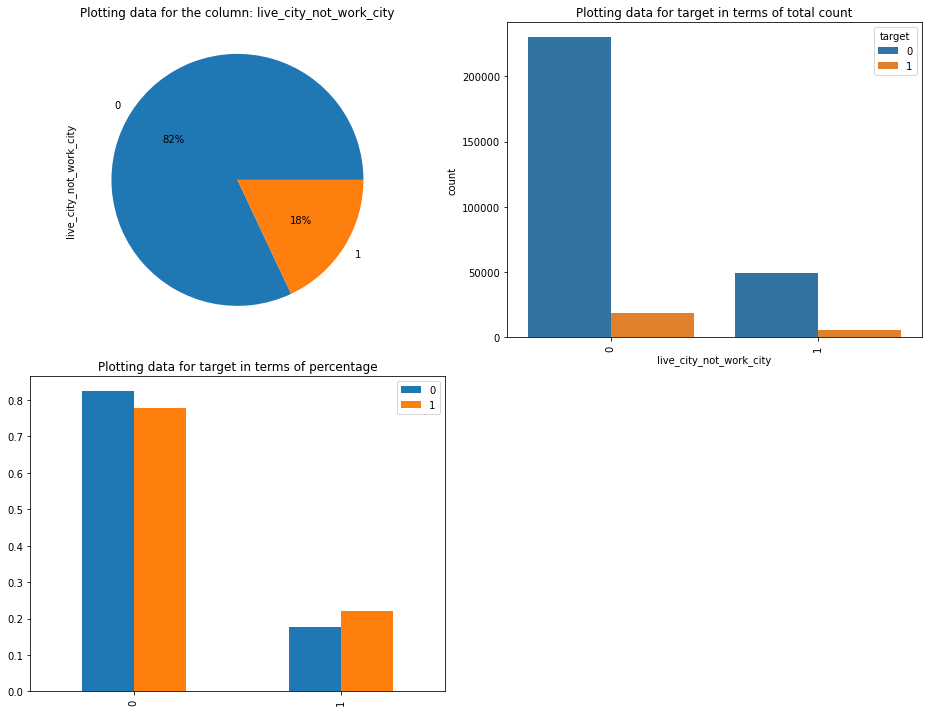

Plotting  flag_own_car


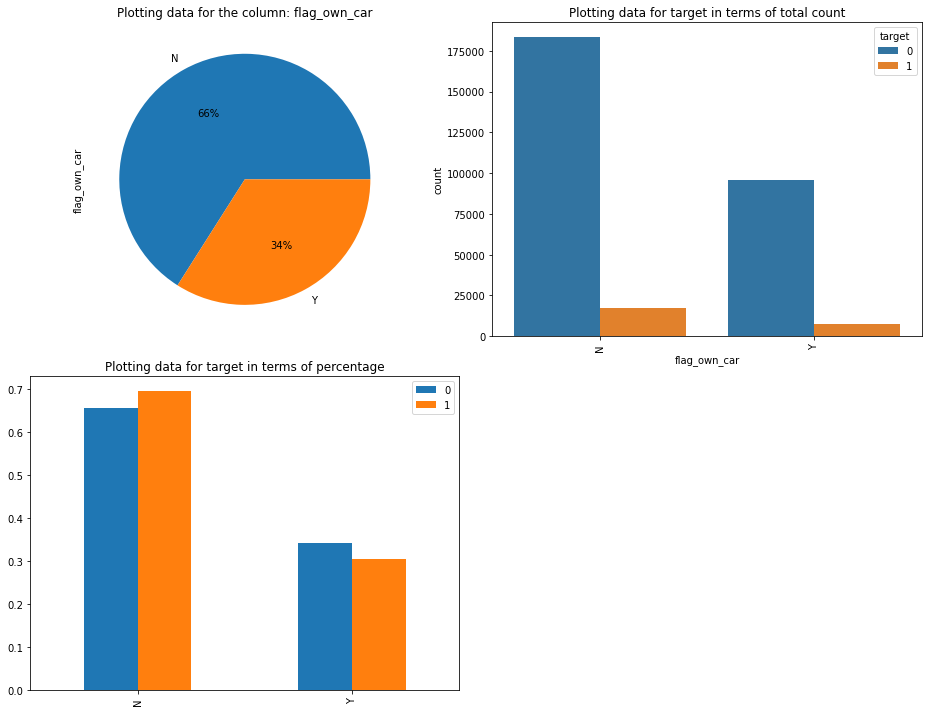

Plotting  name_contract_type


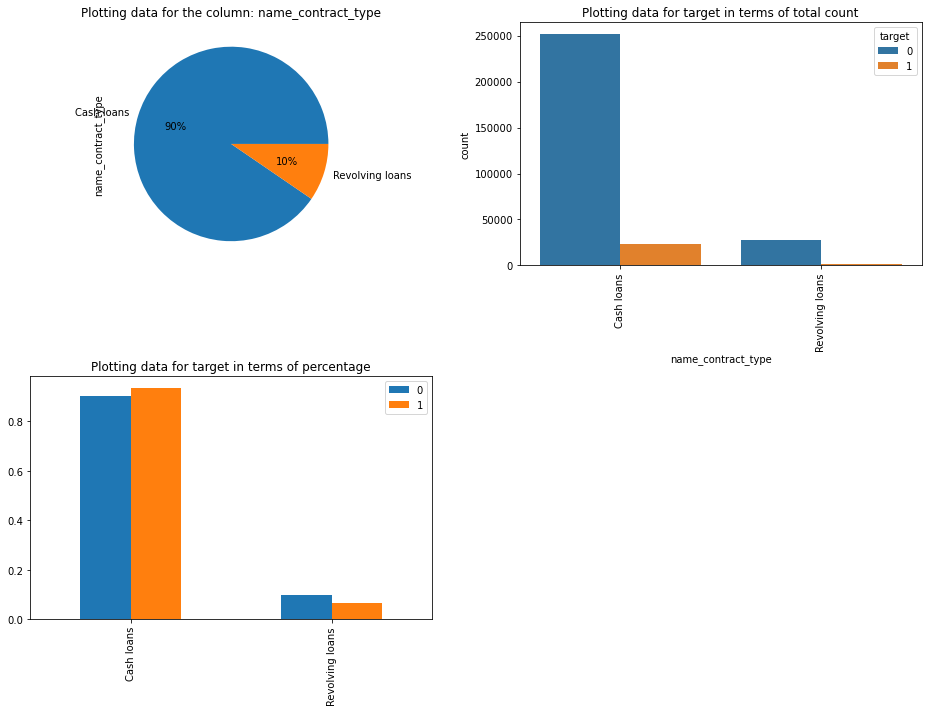

Plotting  flag_phone


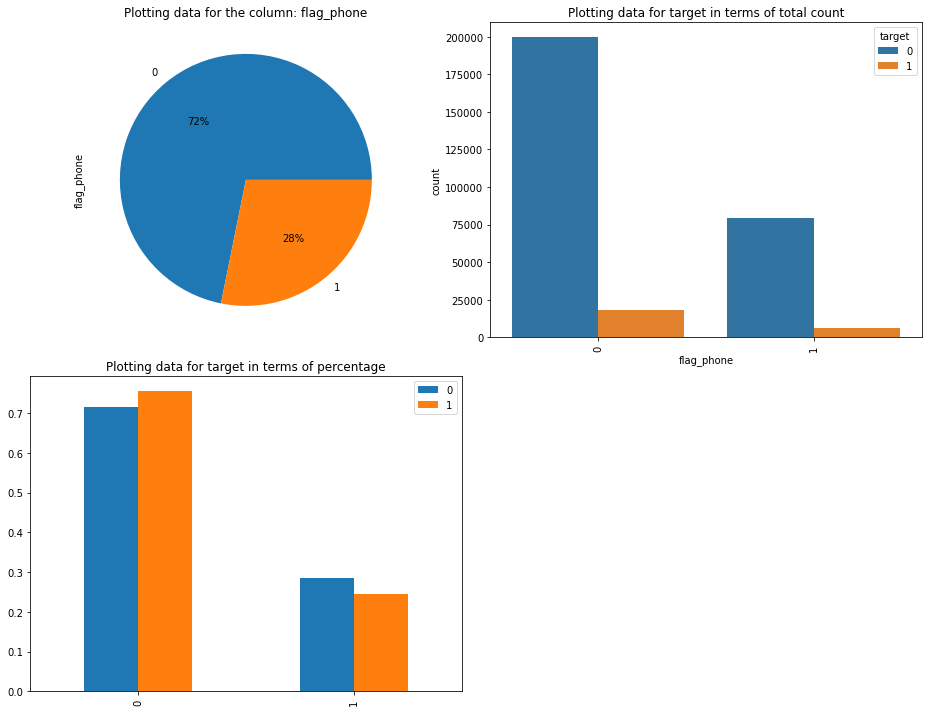

Plotting  region_rating_client_w_city


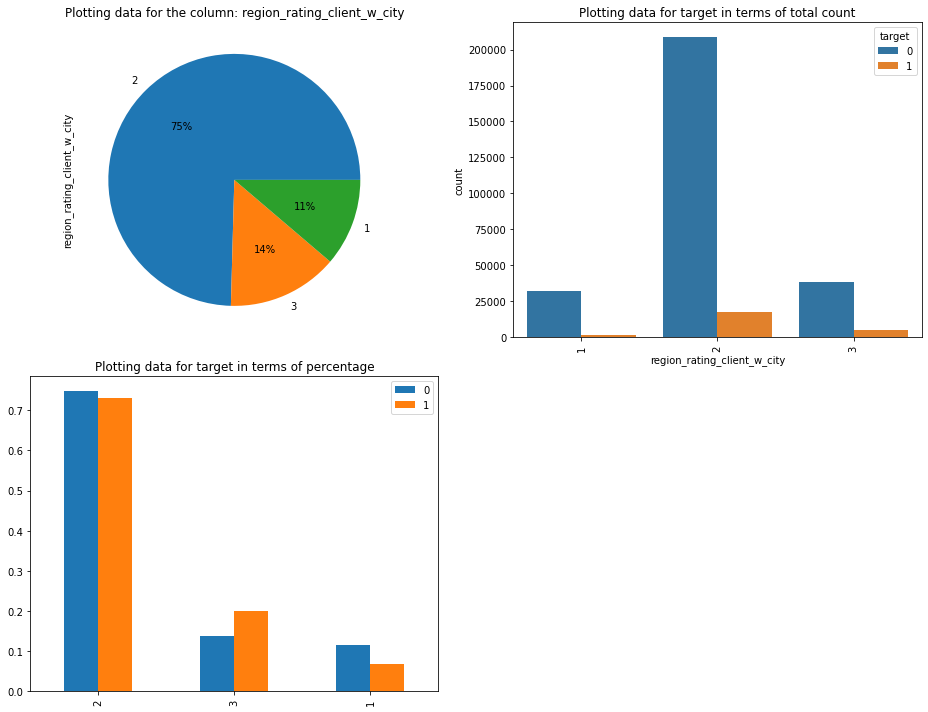

Plotting  flag_document_21


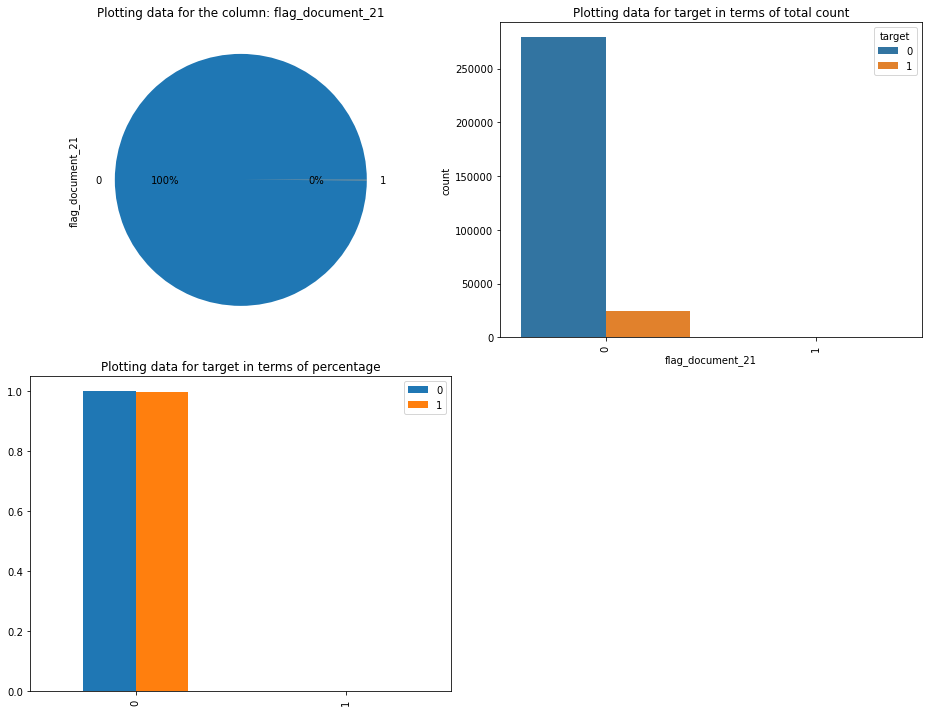

Plotting  reg_city_not_work_city


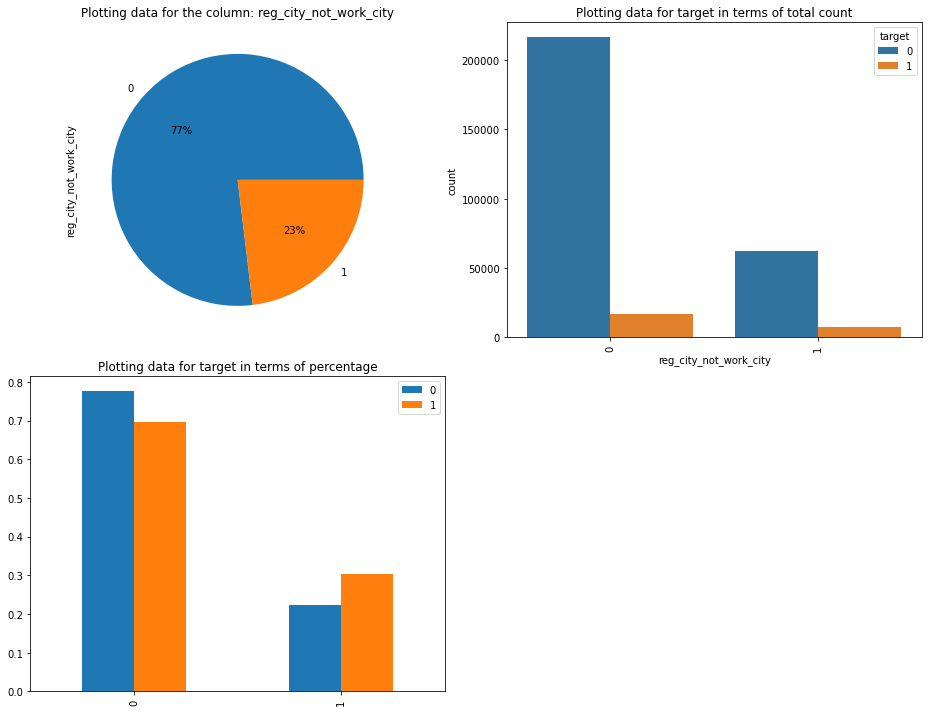

Plotting  weekday_appr_process_start


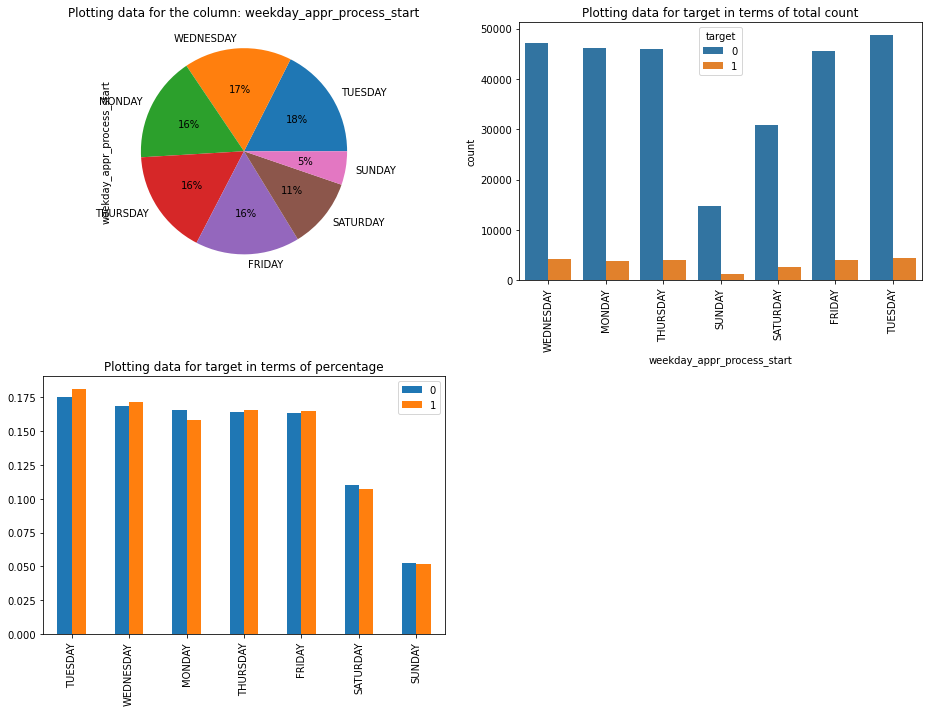

Plotting  reg_city_not_live_city


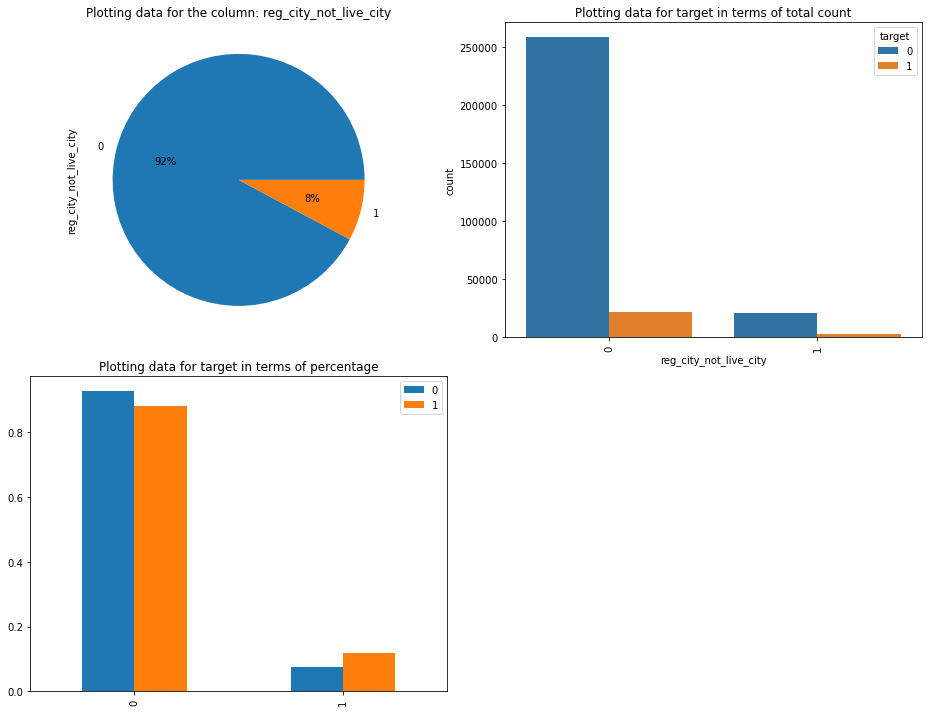

Plotting  flag_work_phone


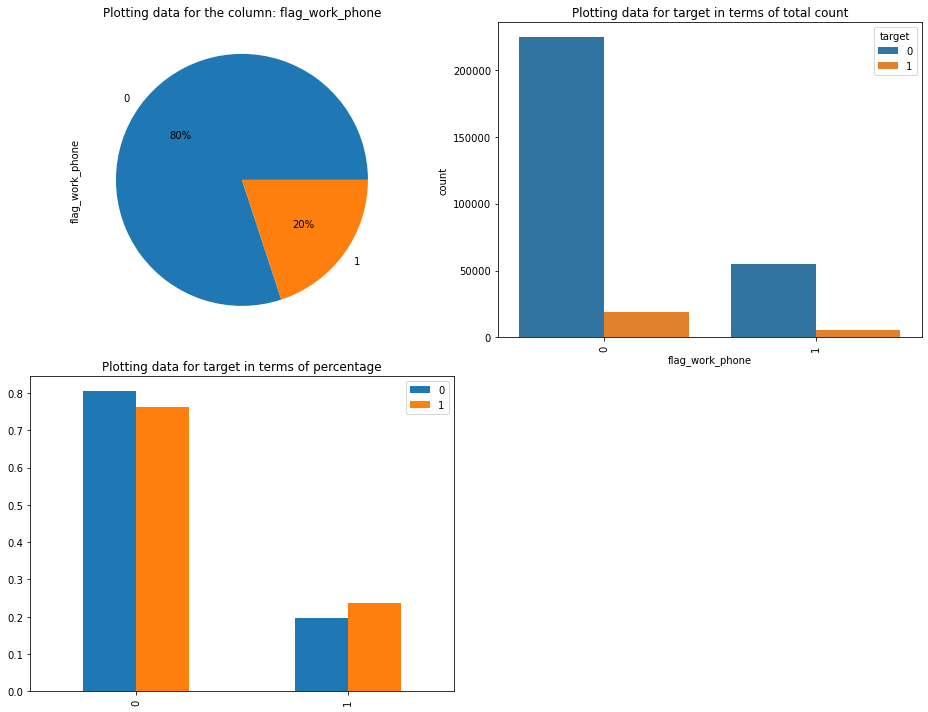

Plotting  flag_document_15


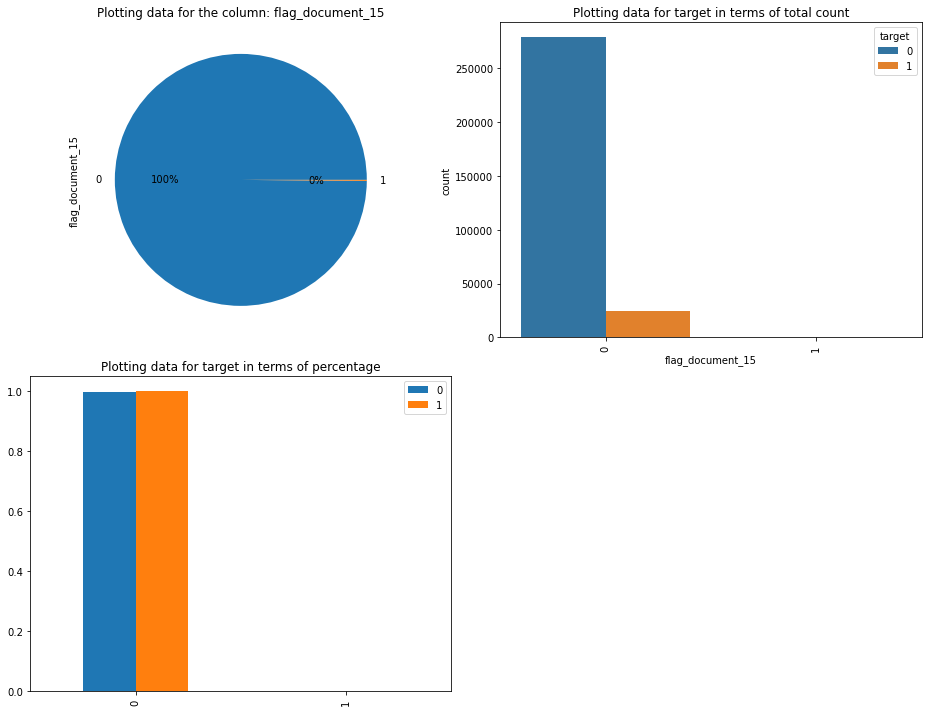

Plotting  name_income_type


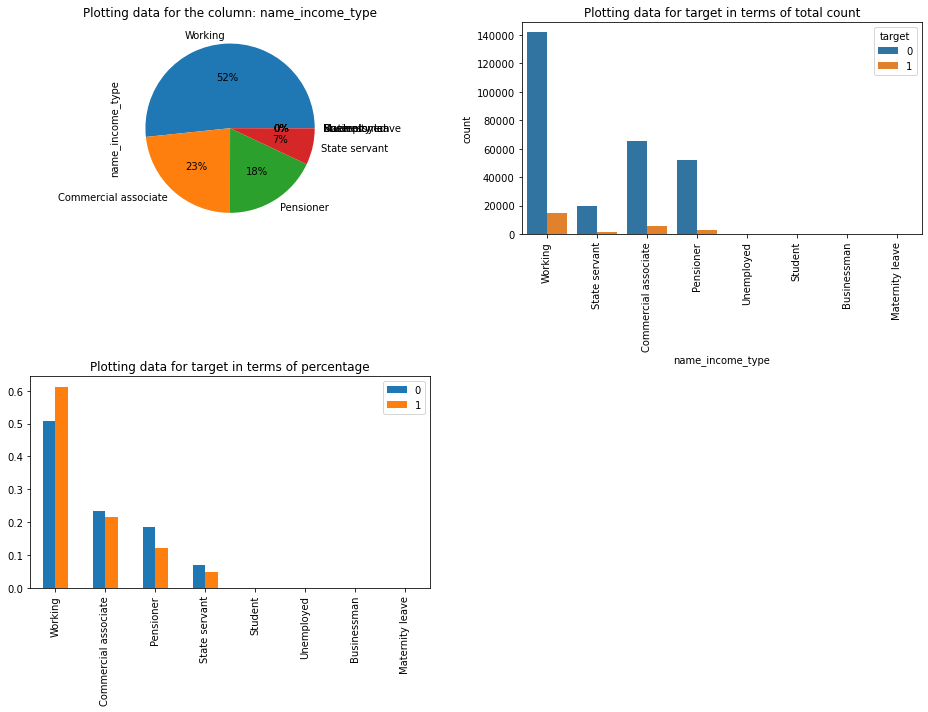

Plotting  name_housing_type


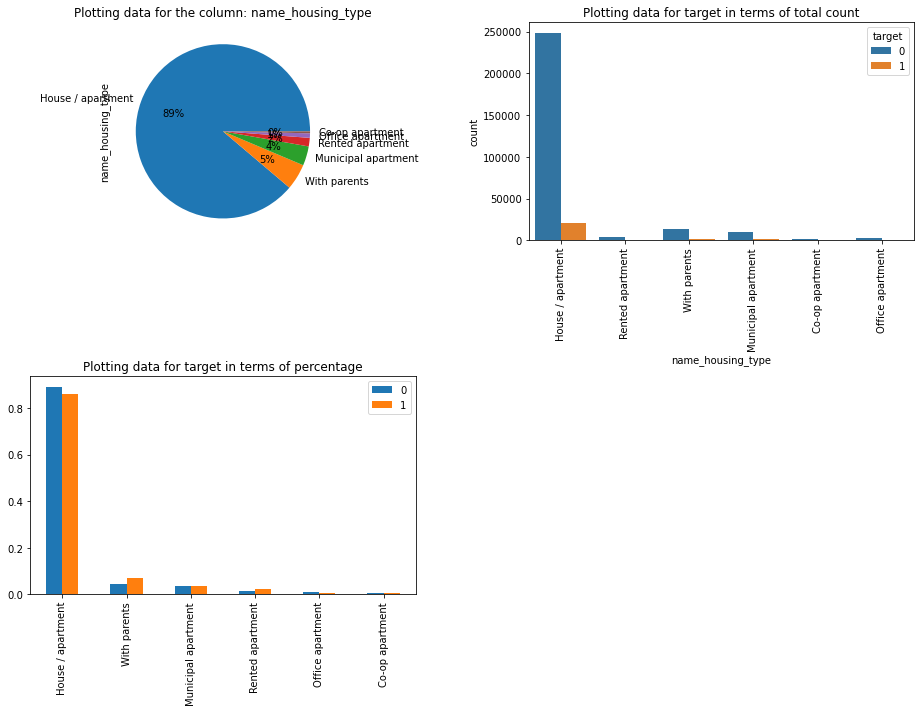

Plotting  flag_document_2


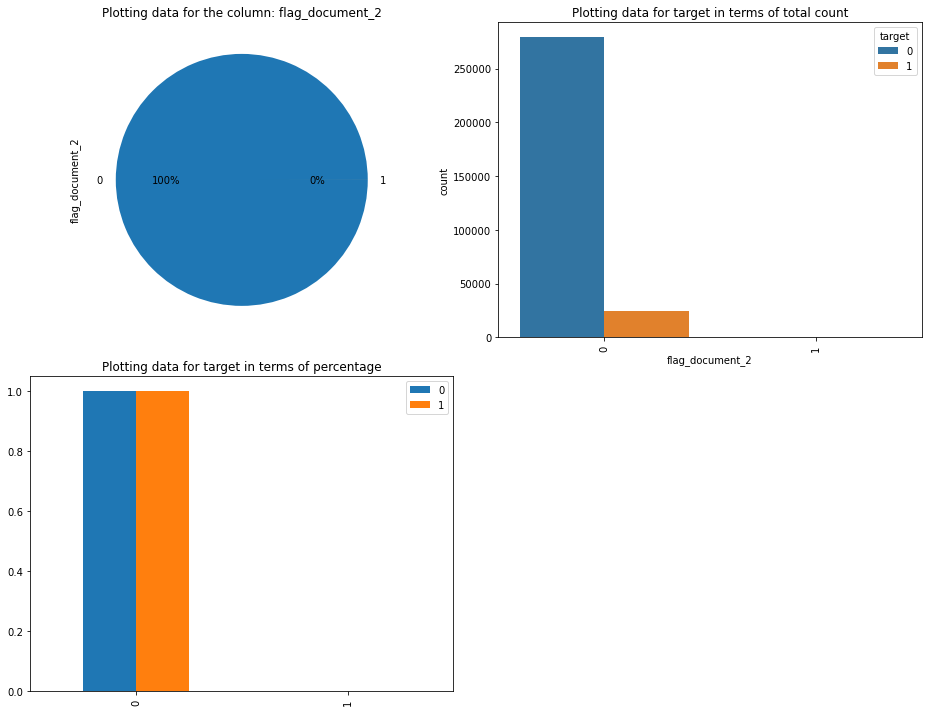

Plotting  flag_email


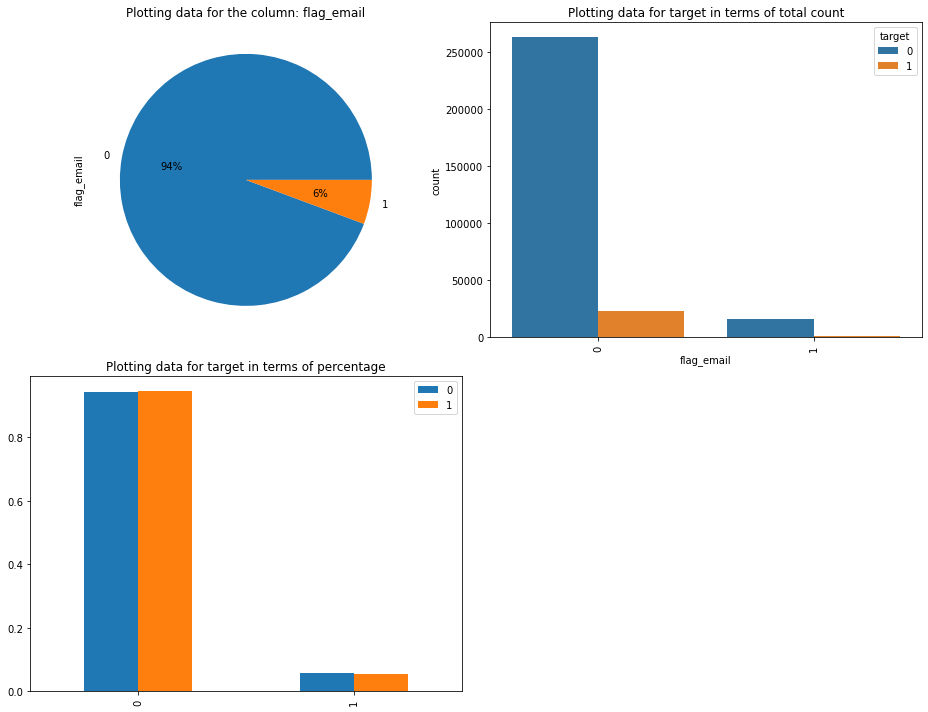

Plotting  flag_document_6


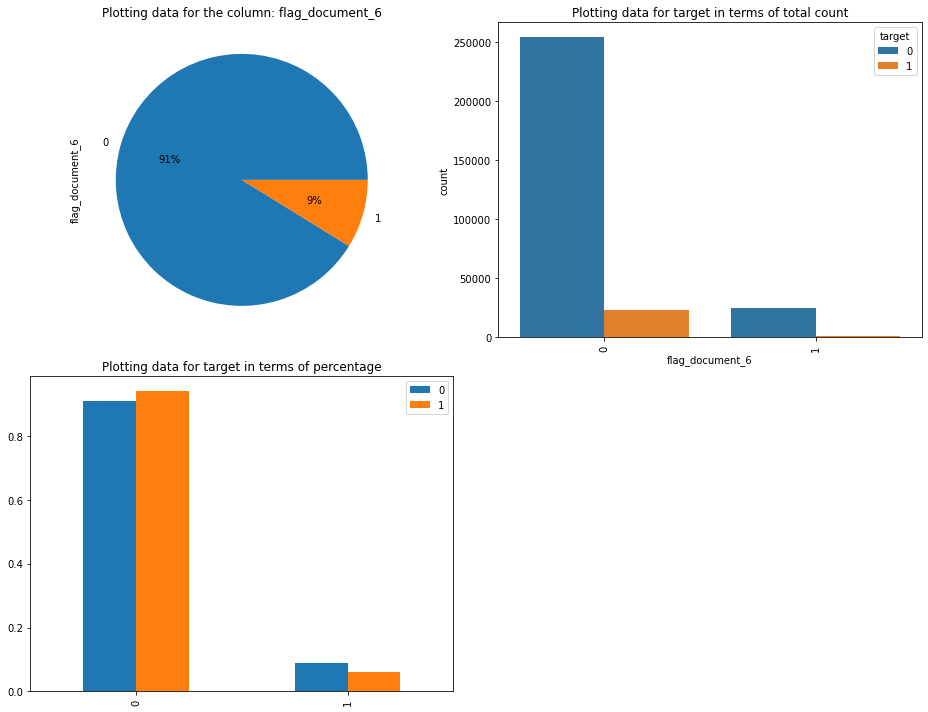

Plotting  flag_document_4


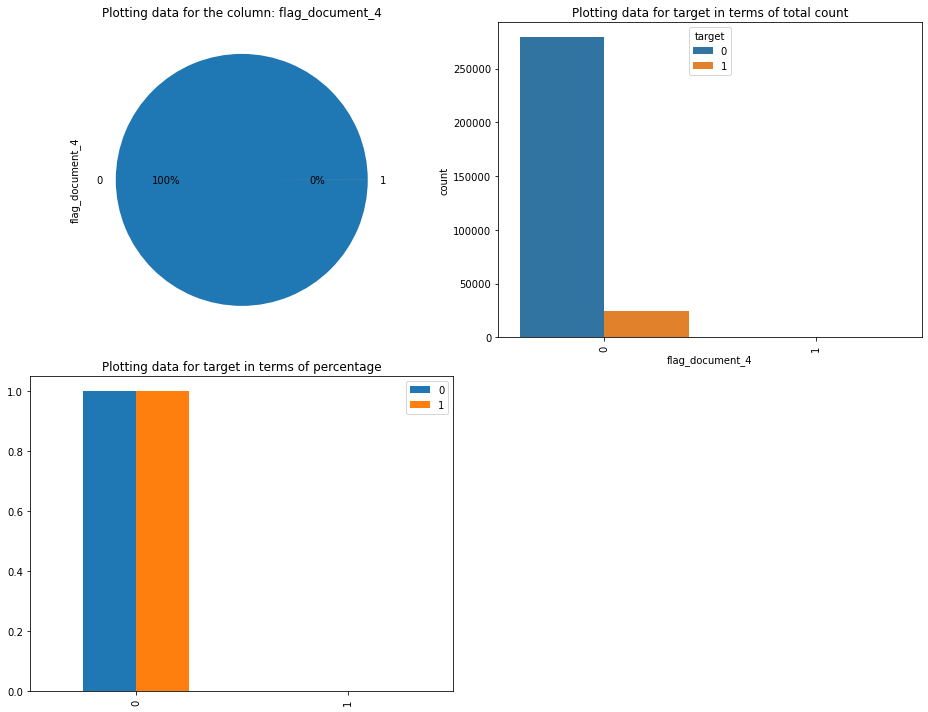

Plotting  flag_emp_phone


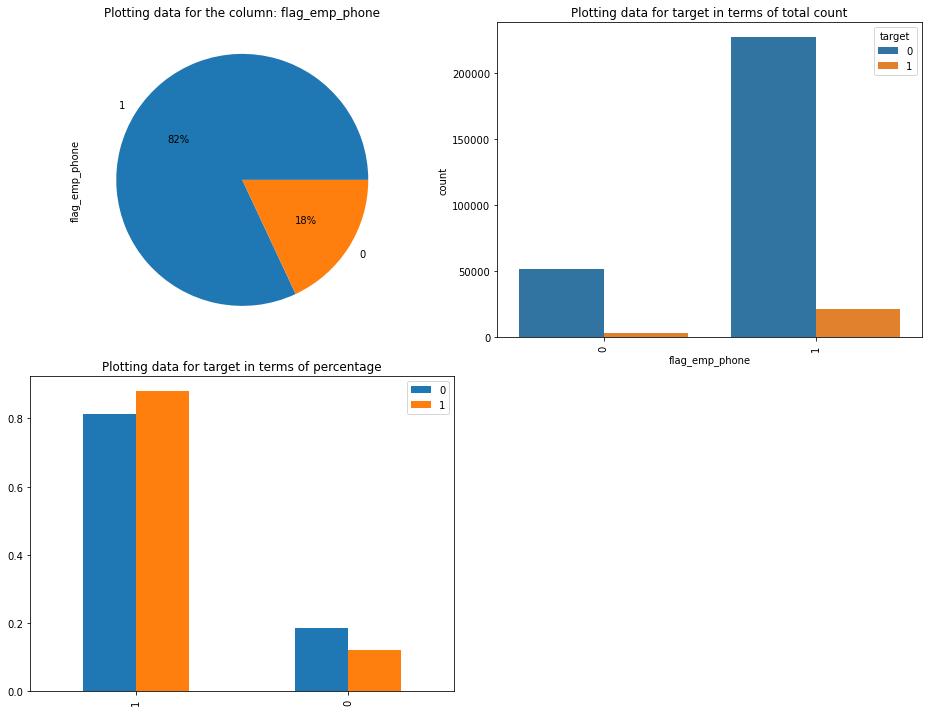

Plotting  flag_document_8


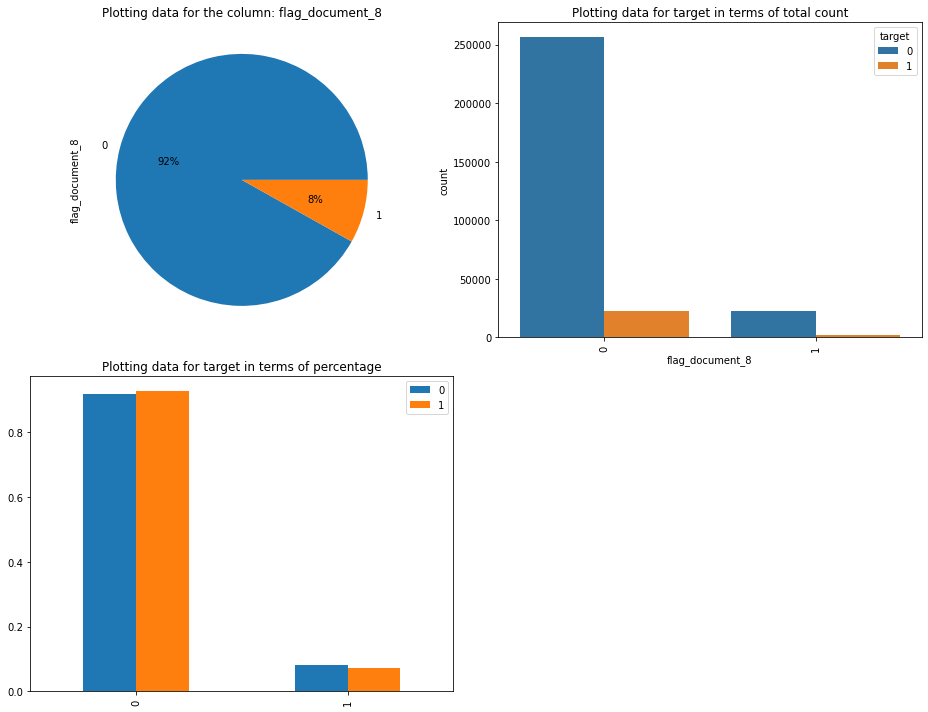

Plotting  name_education_type


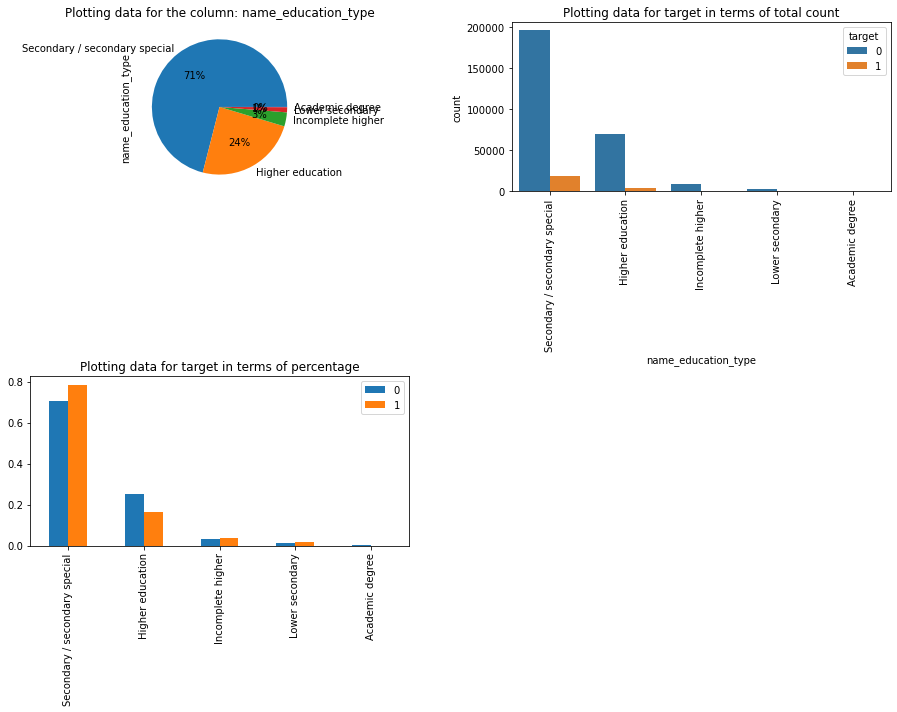

Plotting  flag_document_9


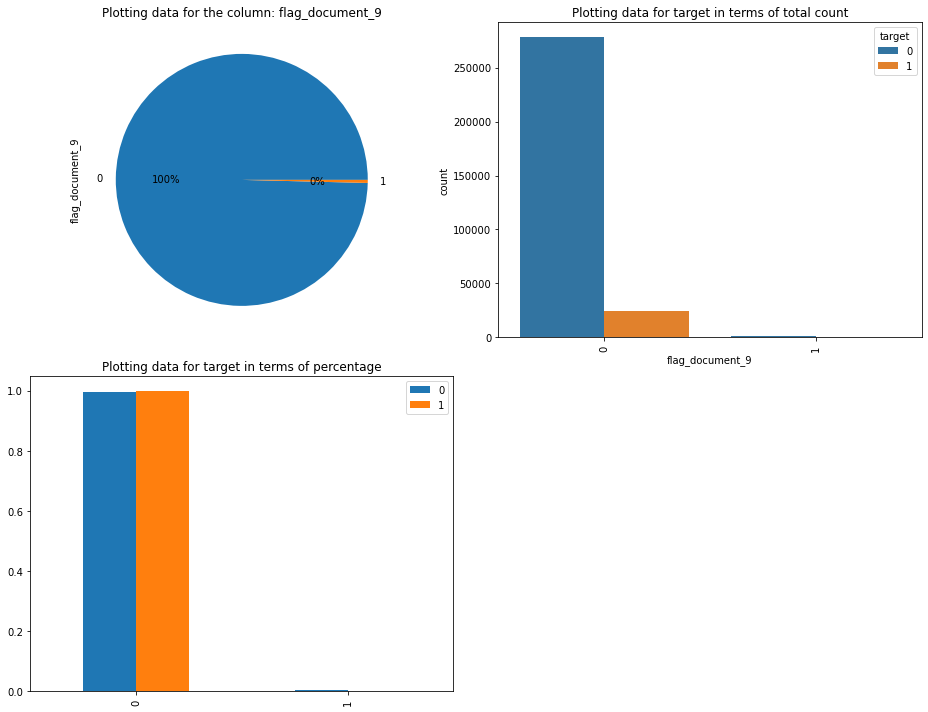

Plotting  name_type_suite


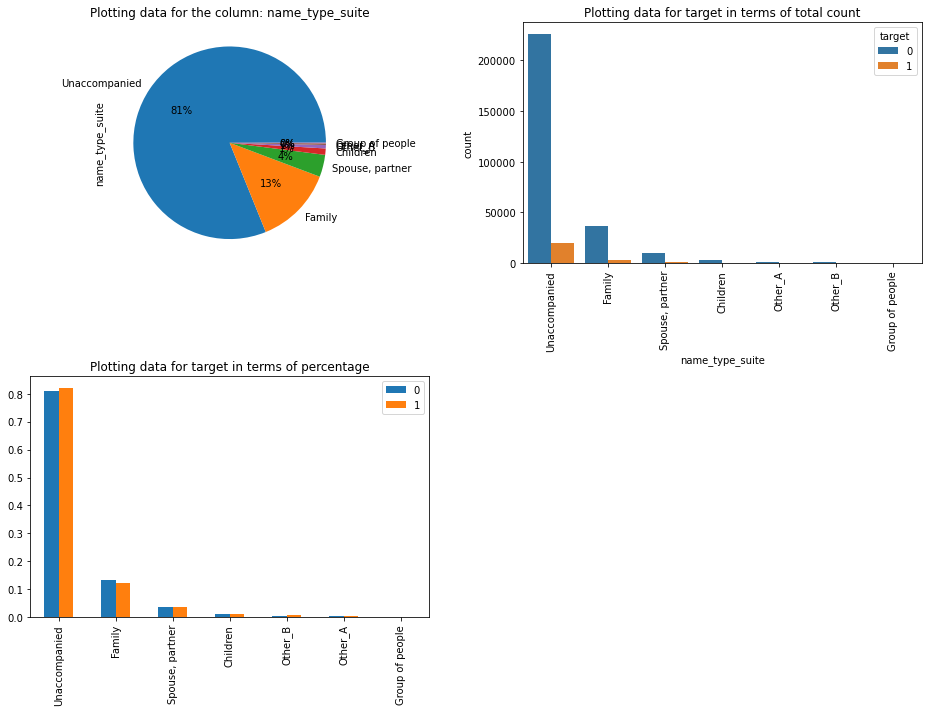

Plotting  region_rating_client


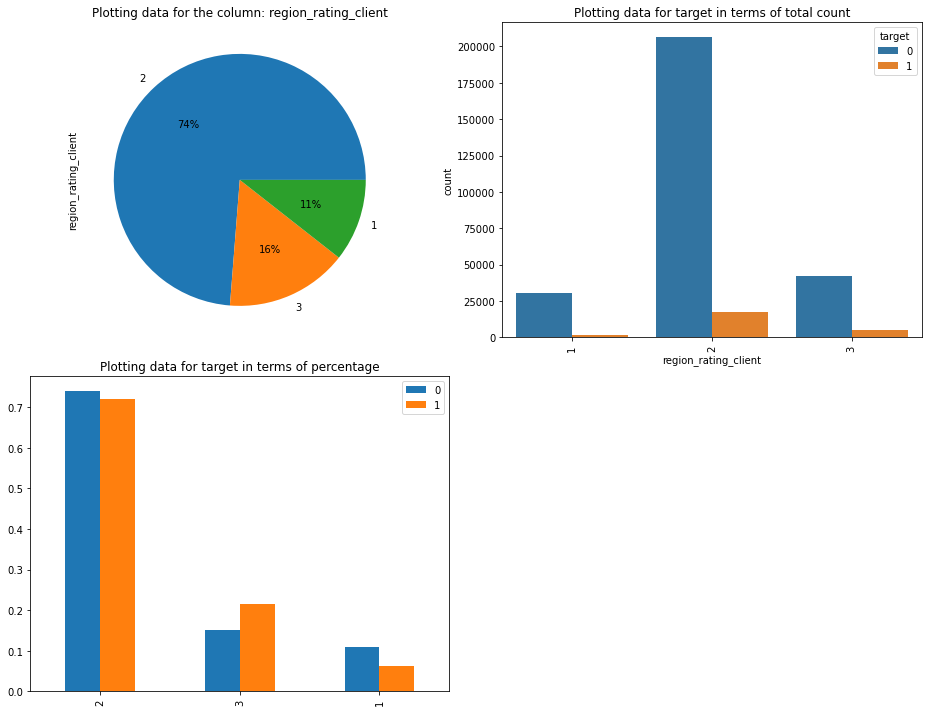

Plotting  flag_document_10


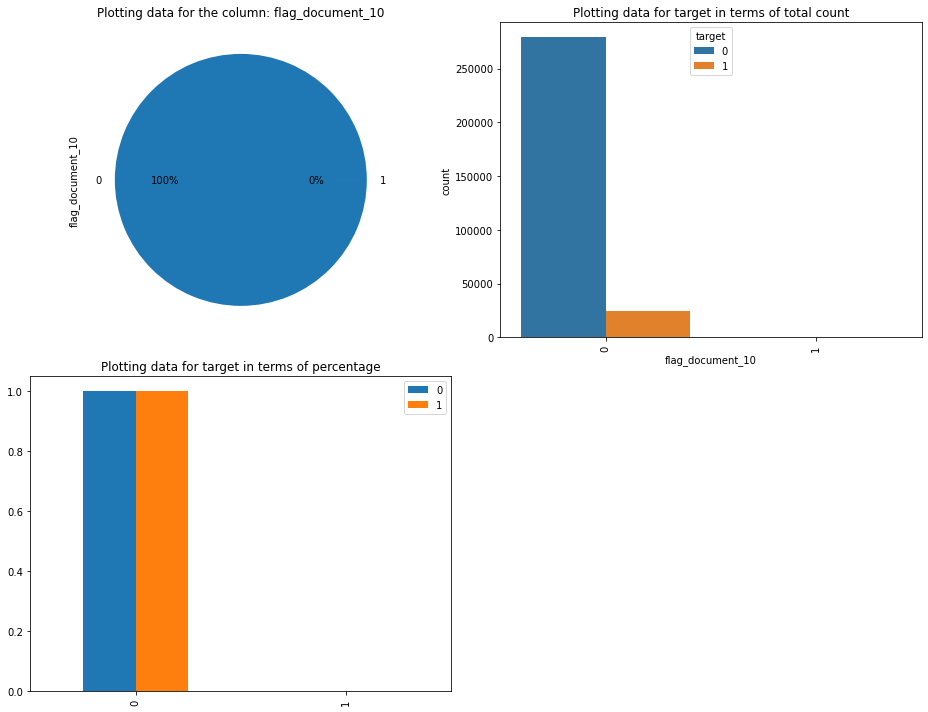

Plotting  live_region_not_work_region


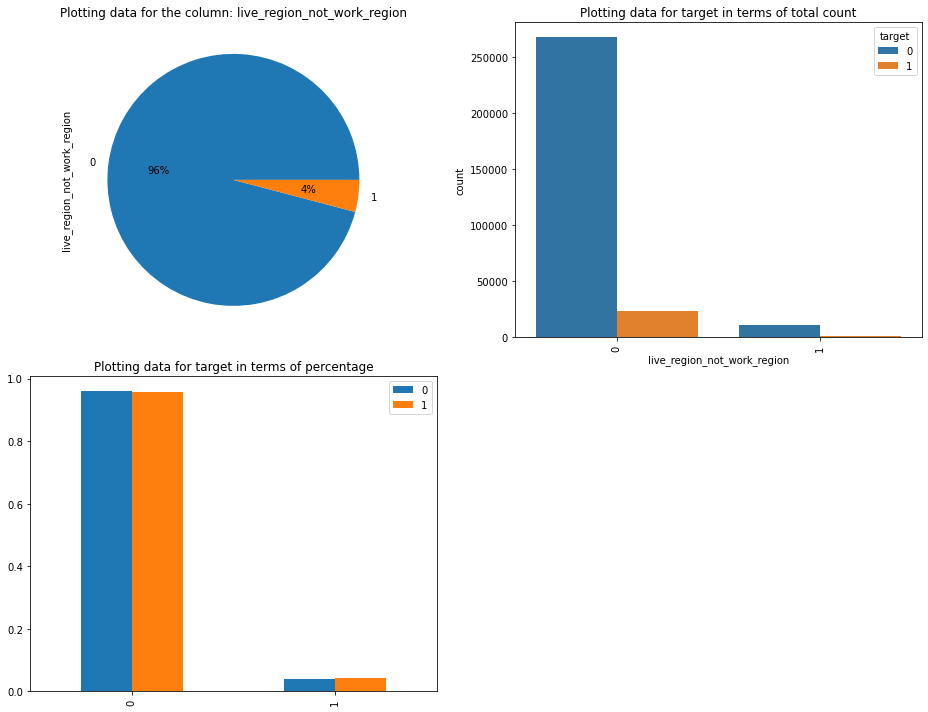

In [321]:
for column in cat_col:
    print("Plotting ", column)
    plotting(apdata,train0, train1, column)

Further, we plot the mean values of target for all categories of categorical columns. This gives us an understanding of the default rates in each category.

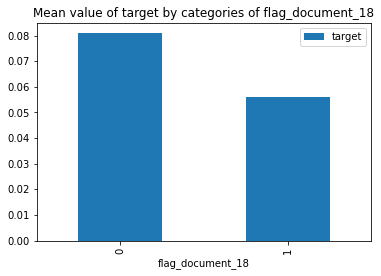

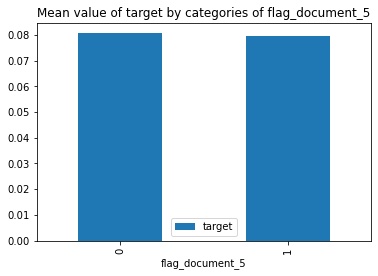

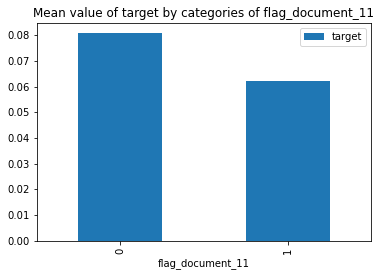

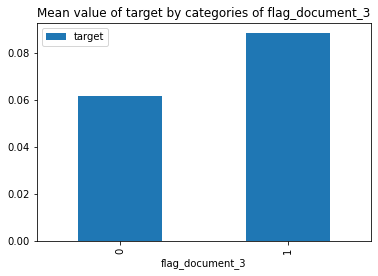

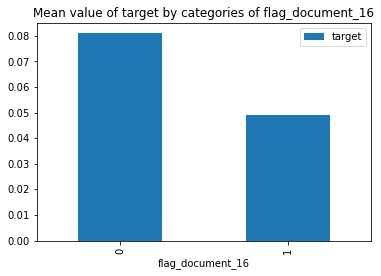

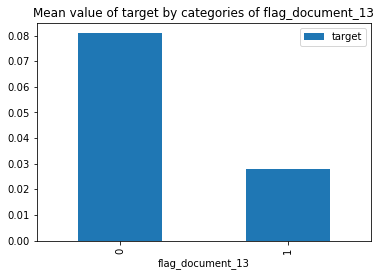

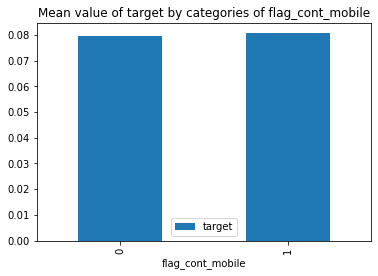

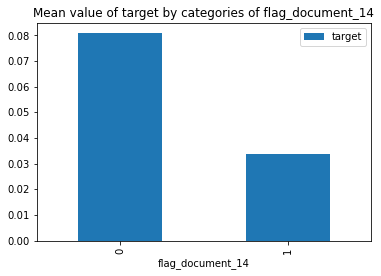

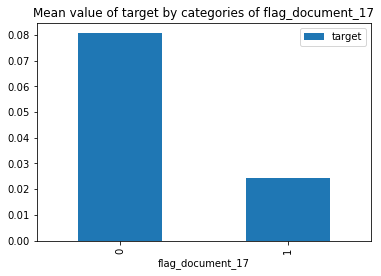

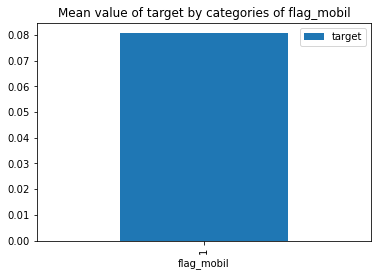

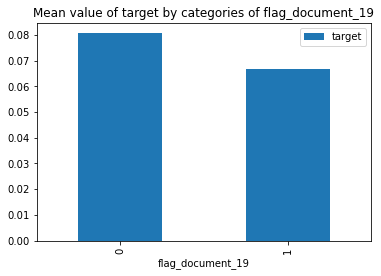

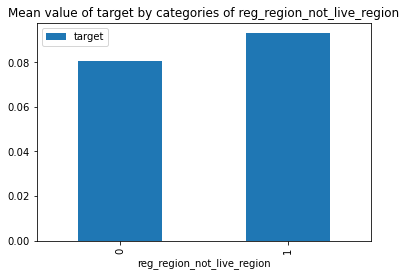

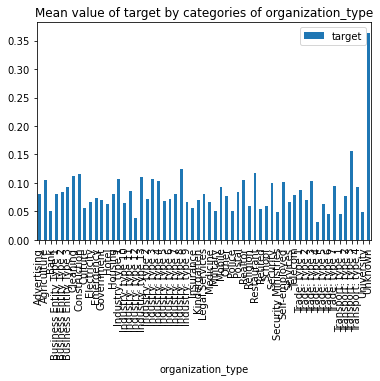

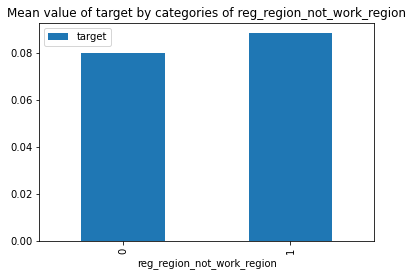

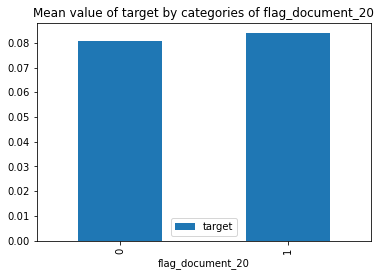

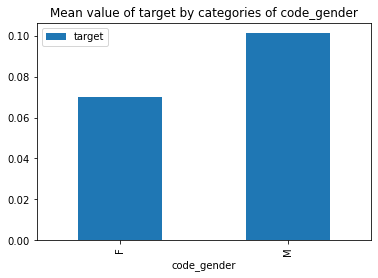

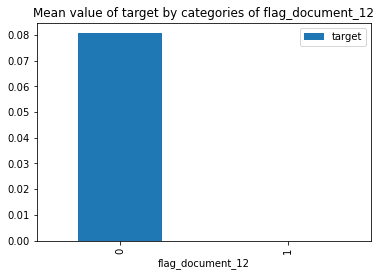

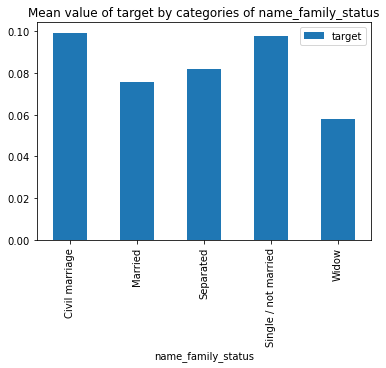

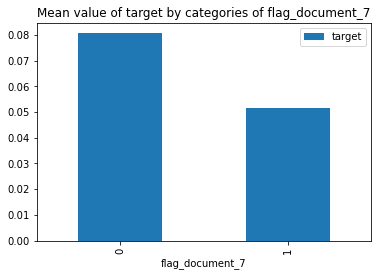

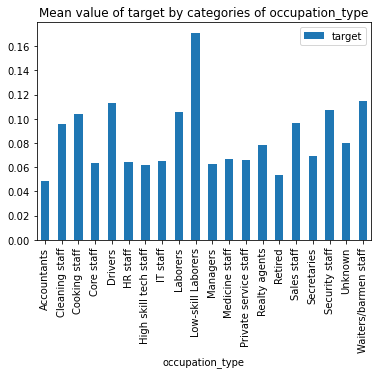

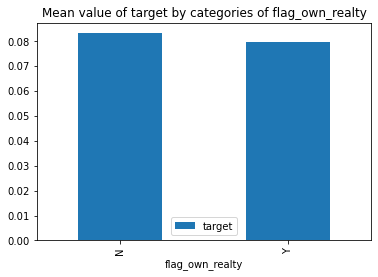

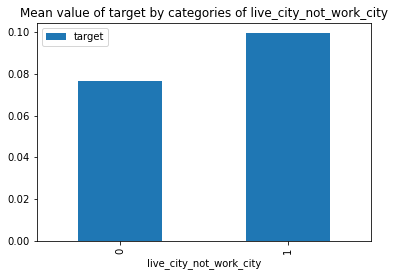

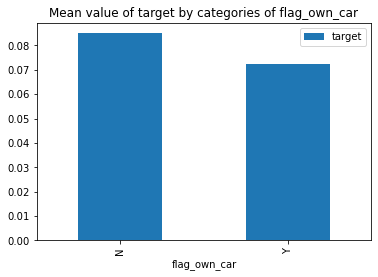

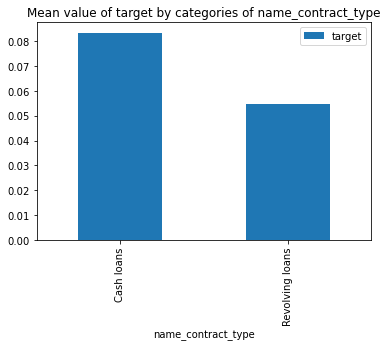

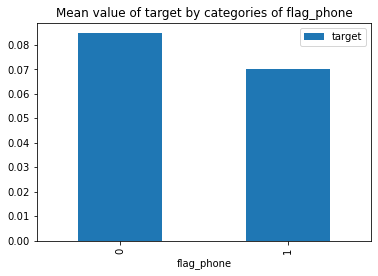

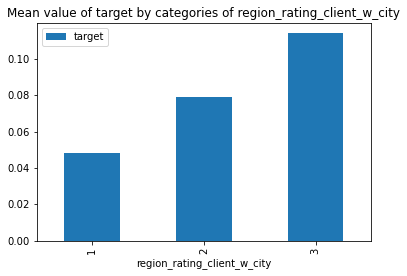

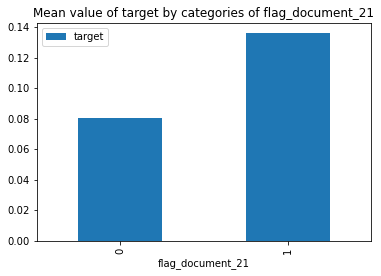

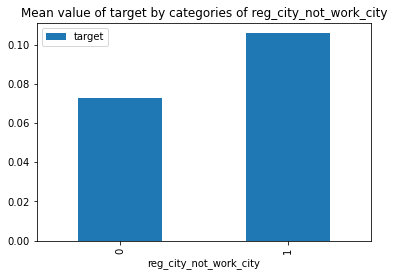

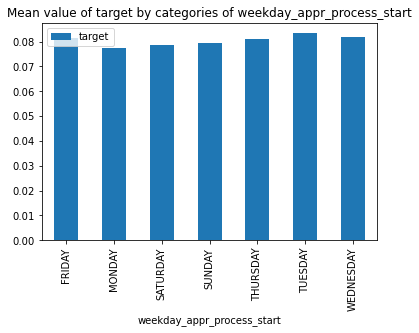

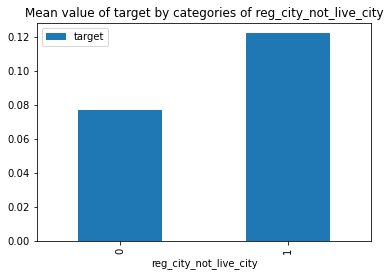

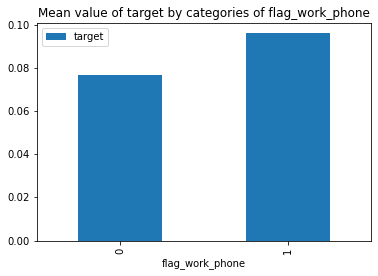

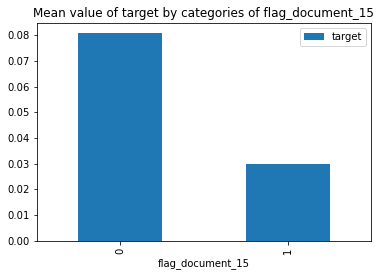

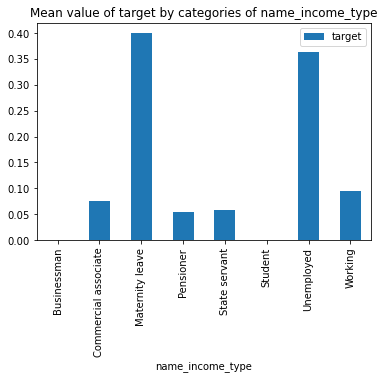

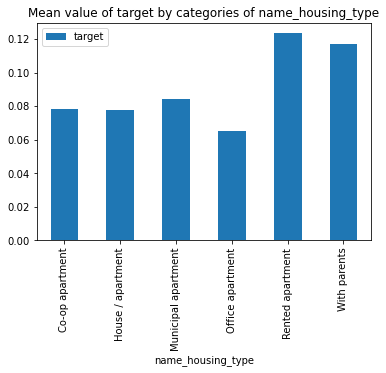

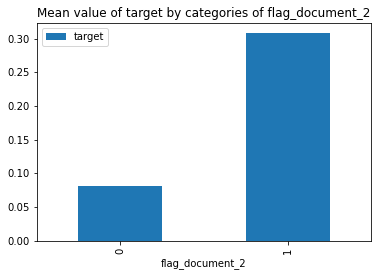

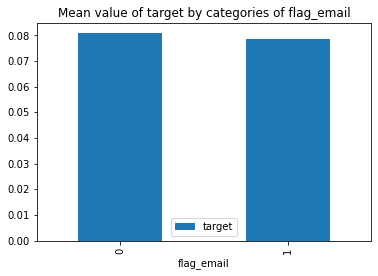

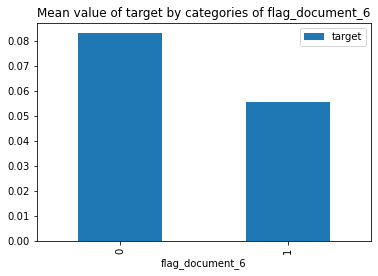

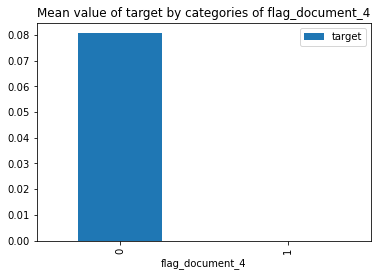

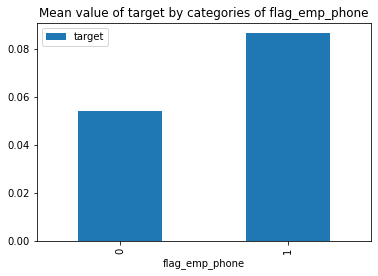

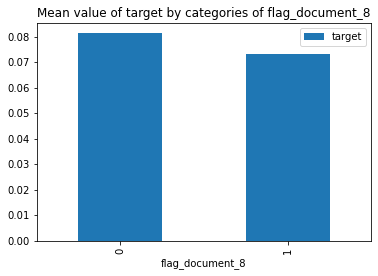

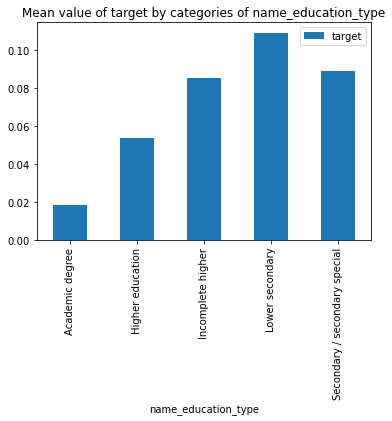

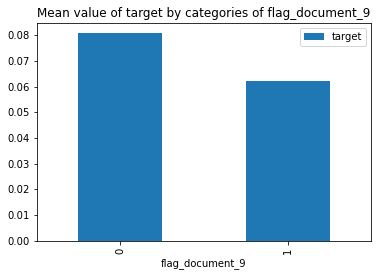

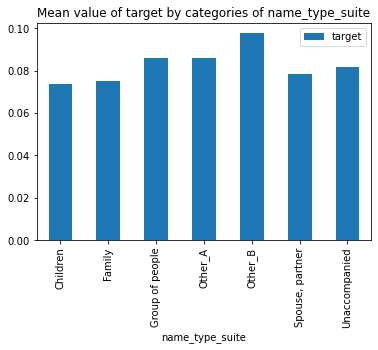

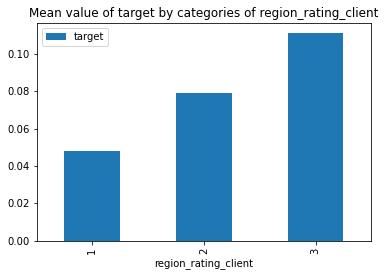

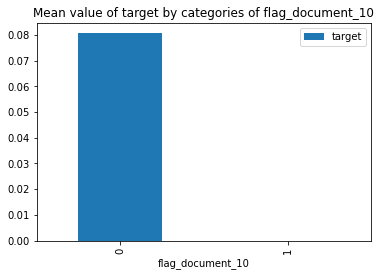

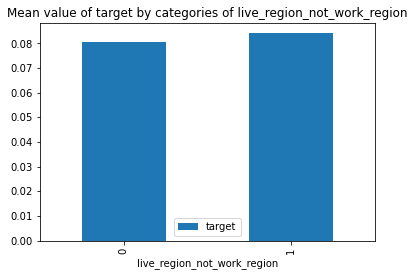

In [322]:
for column in cat_col : 
    pd.pivot_table(data = apdata, index = column, values = "target", aggfunc = 'mean').plot(kind = 'bar')
    plt.title("Mean value of target by categories of " + column)
    plt.show()

**4.3 Numerical Variable Analysis**
We plot the box plot distribution for all numeric variables by target.

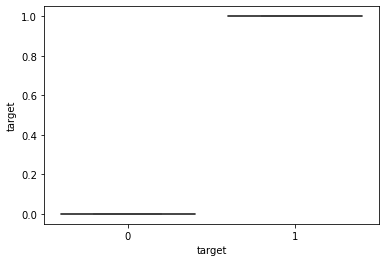

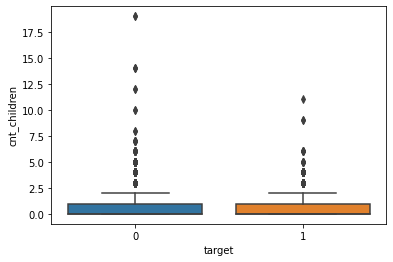

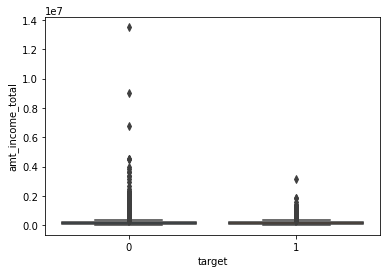

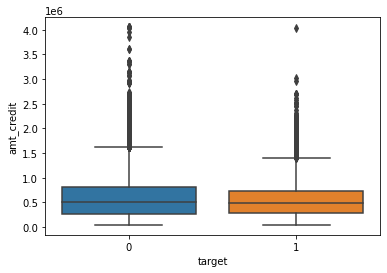

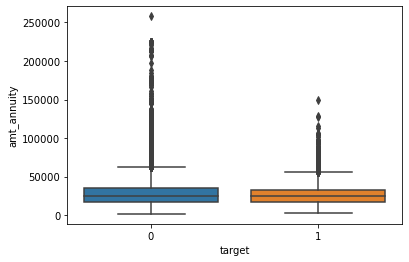

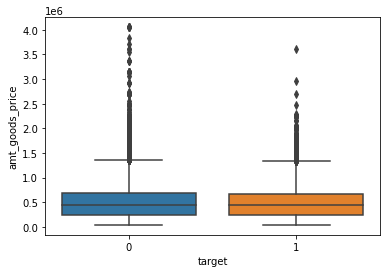

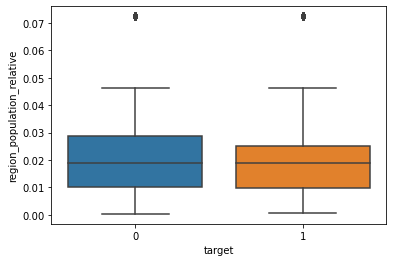

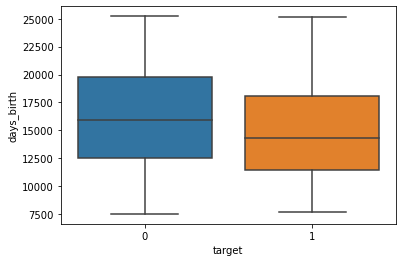

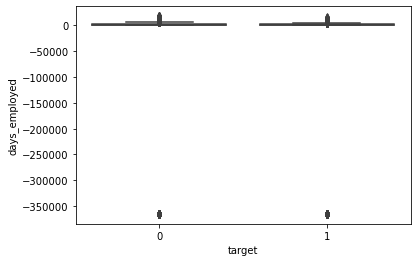

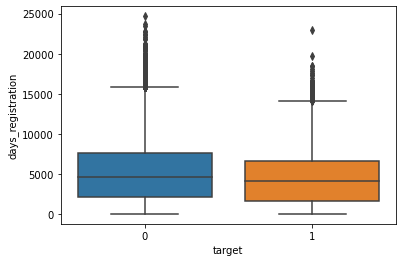

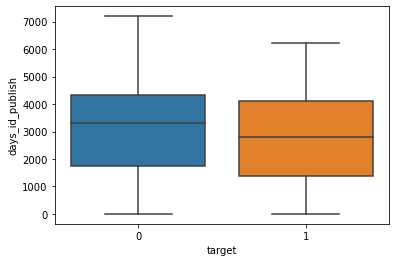

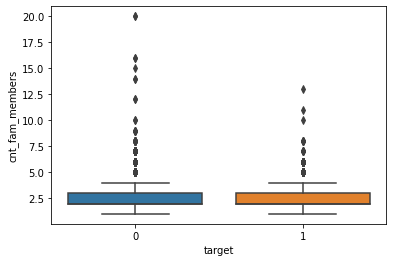

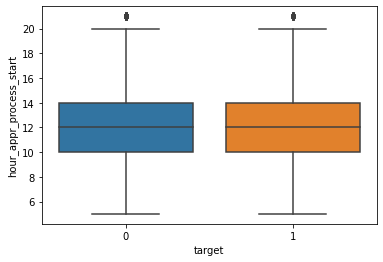

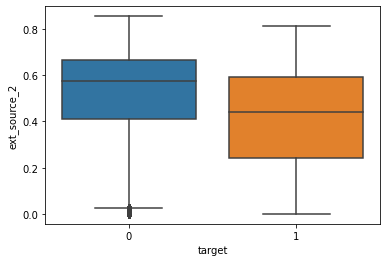

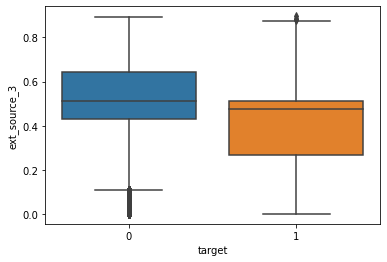

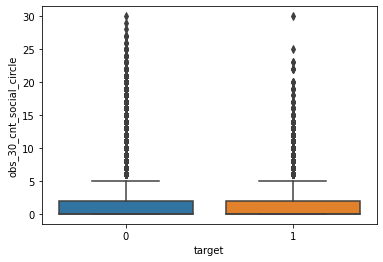

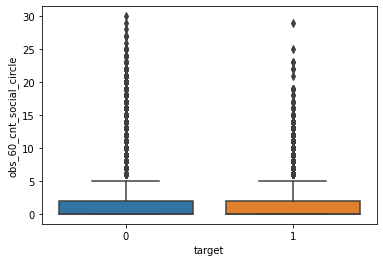

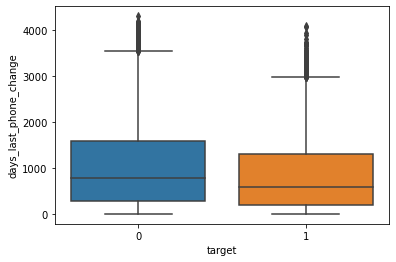

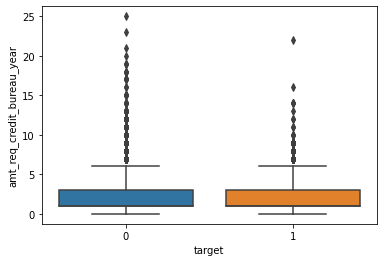

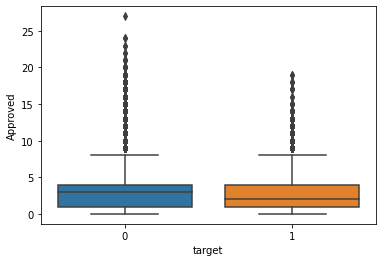

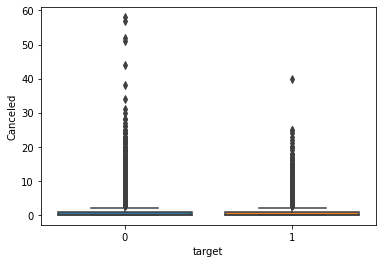

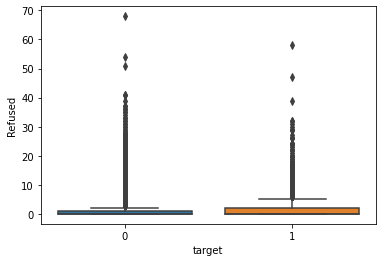

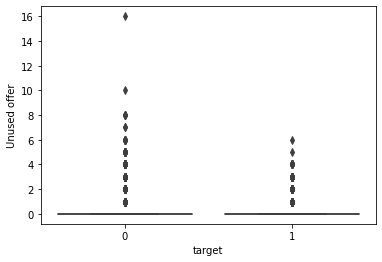

In [323]:
for variable in num_col :
    sns.boxplot(data = apdata, y = variable, x = "target")
    plt.show()

As previously deduced, the data for days_employed is plotted separately after removing negative values.

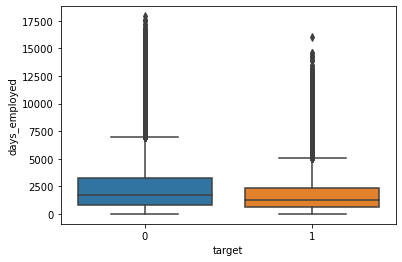

In [324]:
sns.boxplot(data = apdata[apdata.days_employed >= 0], y = "days_employed", x = "target")
plt.show()

We also plot the mean, median and 75th quantile values for each numeric variable by target. Then, we plot the same plot for days employed after removing negatives.

target


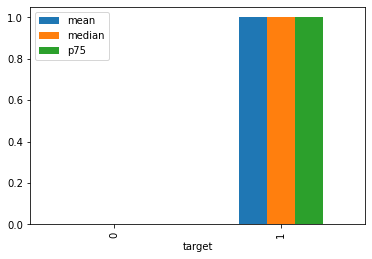

cnt_children


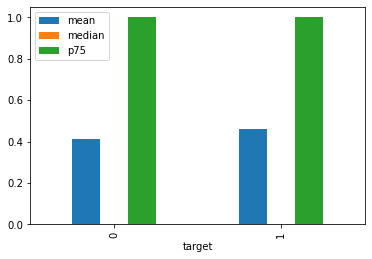

amt_income_total


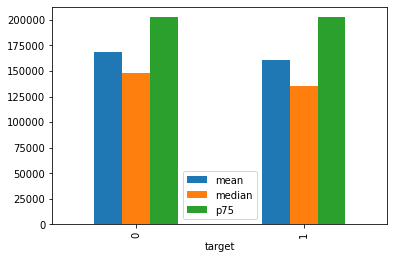

amt_credit


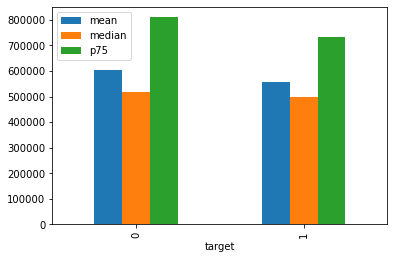

amt_annuity


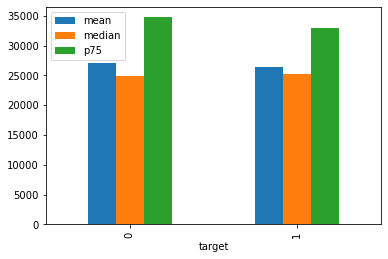

amt_goods_price


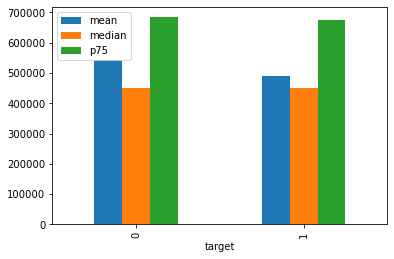

region_population_relative


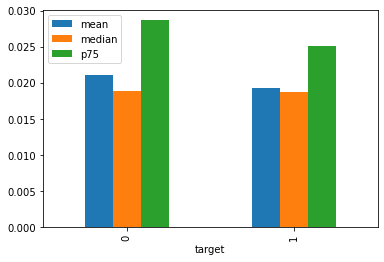

days_birth


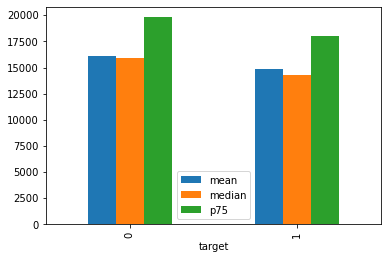

days_employed


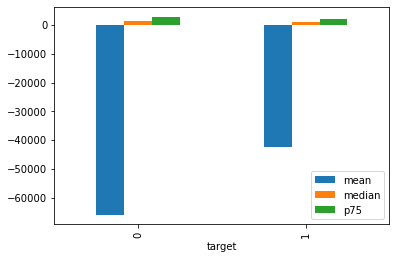

days_registration


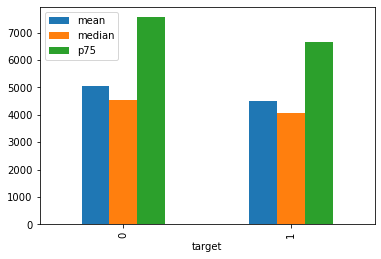

days_id_publish


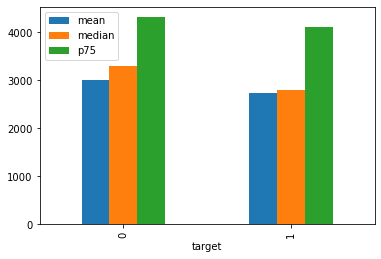

cnt_fam_members


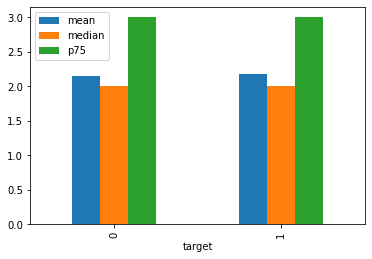

hour_appr_process_start


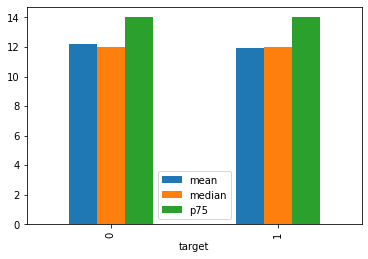

ext_source_2


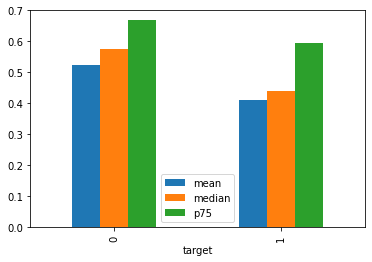

ext_source_3


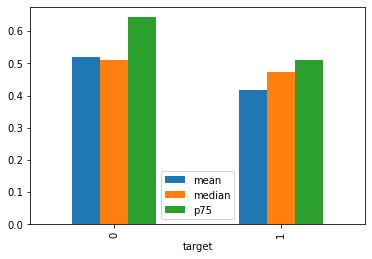

obs_30_cnt_social_circle


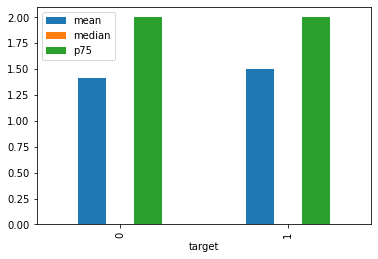

obs_60_cnt_social_circle


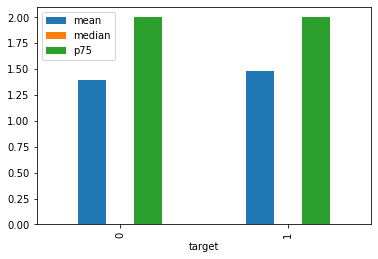

days_last_phone_change


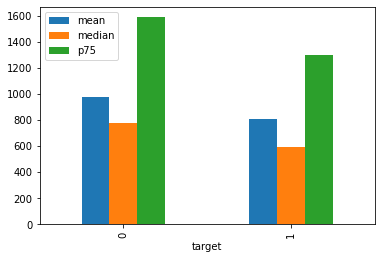

amt_req_credit_bureau_year


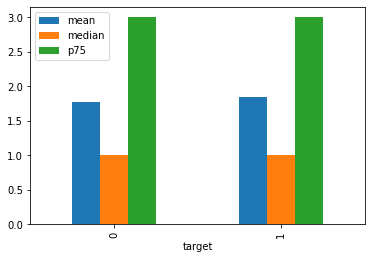

Approved


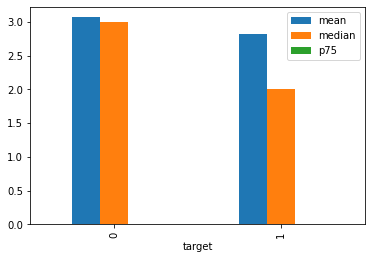

Canceled


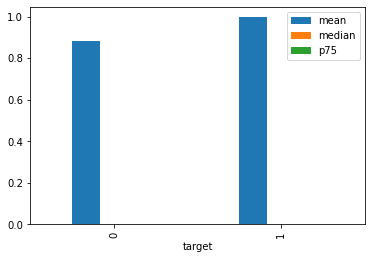

Refused


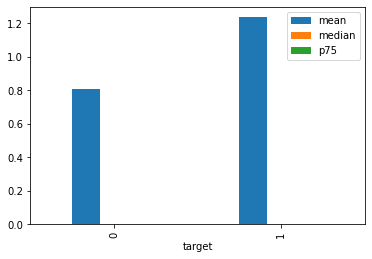

Unused offer


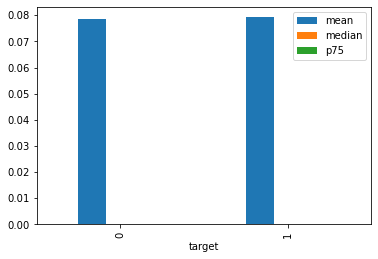

In [325]:
def p75(x):
    return np.quantile(x,0.75)

for variable in num_col:
    print(variable)
    apdata.groupby(by = "target")[variable].aggregate(["mean","median",p75]).plot(kind='bar')
    plt.show()

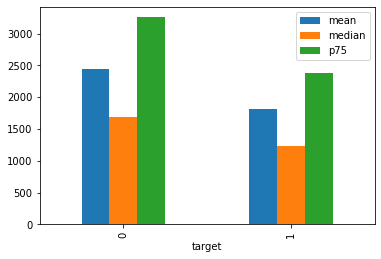

In [326]:
apdata[apdata.days_employed > 0].groupby(by = "target")["days_employed"].aggregate(["mean","median",p75]).plot(kind = 'bar')
plt.show()

**4.4 Correlation Heatmap by Target** :
We now plot the correlation matrix for each target category.

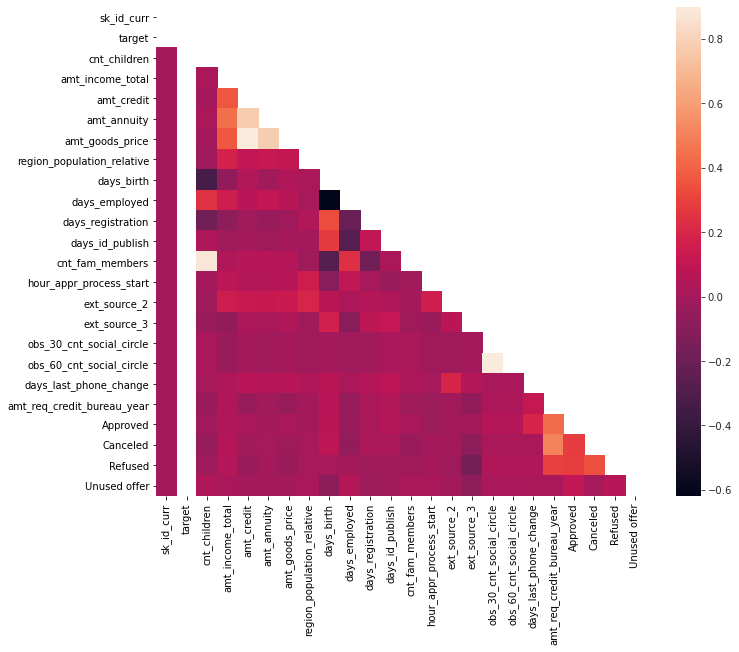

In [327]:
corr = train0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.9, square=True);

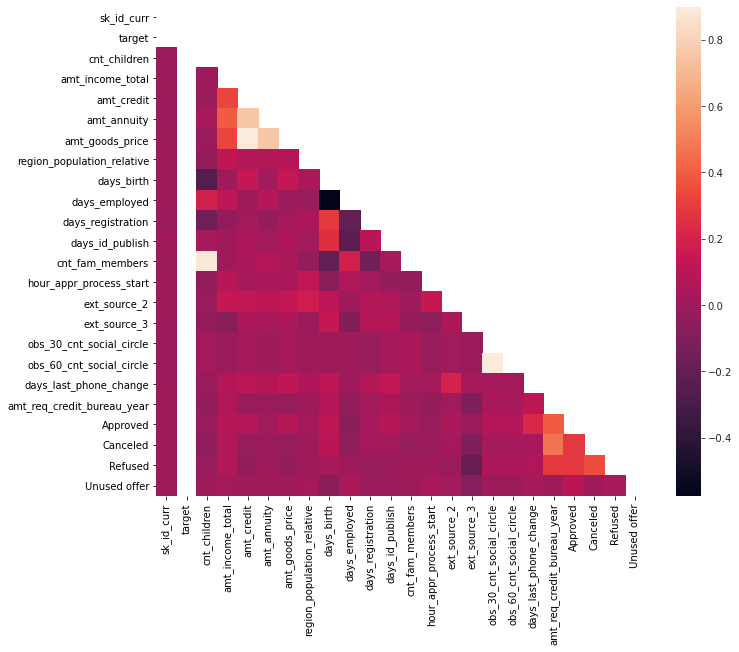

In [328]:
corr = train1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.9, square=True);

**4.5 Top 10 correlations** : Finally we plot the top 10 correlations for each target.

In [329]:
correlation_0 = train0.corr().abs()
correlation_0 = correlation_0.unstack().sort_values(kind='quicksort')
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0.drop_duplicates()
correlation_0 = correlation_0[correlation_0 != 1.0 ]
print(correlation_0.tail(10))

amt_income_total            amt_goods_price               0.367631
Approved                    amt_req_credit_bureau_year    0.427652
amt_annuity                 amt_income_total              0.438784
amt_req_credit_bureau_year  Canceled                      0.508100
days_birth                  days_employed                 0.618589
amt_credit                  amt_annuity                   0.771698
amt_goods_price             amt_annuity                   0.777208
cnt_children                cnt_fam_members               0.878656
amt_credit                  amt_goods_price               0.987263
obs_30_cnt_social_circle    obs_60_cnt_social_circle      0.998396
dtype: float64


In [330]:
correlation_1 = train1.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind='quicksort')
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1.drop_duplicates()
correlation_1 = correlation_1[correlation_1 != 1.0 ]
print(correlation_1.tail(10))

Canceled                    Refused                     0.347138
amt_req_credit_bureau_year  Approved                    0.394992
amt_annuity                 amt_income_total            0.398481
amt_req_credit_bureau_year  Canceled                    0.469531
days_birth                  days_employed               0.575614
amt_annuity                 amt_credit                  0.752279
amt_goods_price             amt_annuity                 0.753036
cnt_children                cnt_fam_members             0.885625
amt_credit                  amt_goods_price             0.983084
obs_30_cnt_social_circle    obs_60_cnt_social_circle    0.998284
dtype: float64


This brings us to the end of our analysis. Based on our analysis, we now collate our insights from the EDA process.

**5. Insights Obtained from EDA:**

**5.1 Categorical Variables:**
    1. Labourers And Retired Individuals (Pensioners) form around 36% of the samples.
    

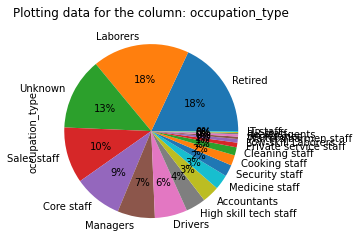

In [331]:
apdata['occupation_type'].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title('Plotting data for the column: occupation_type' )
plt.show()

 2. Among Organizations, Business Entity 3 forms 22% of the samples.

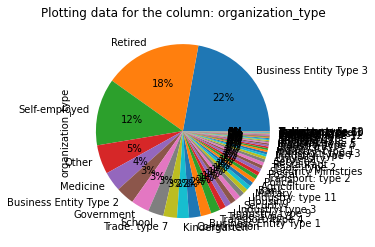

In [332]:
apdata['organization_type'].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title('Plotting data for the column: organization_type' )
plt.show()

   3. Labourers and Drivers have a higher probability of default, while Retired (Pensioners) and Accountants have a lower probability.

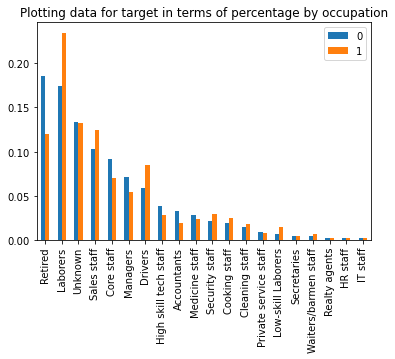

In [333]:
    df = pd.DataFrame()
    df['0']= ((train0['occupation_type'].value_counts())/len(train0))
    df['1']= ((train1['occupation_type'].value_counts())/len(train1))
    df.plot.bar()
    plt.title('Plotting data for target in terms of percentage by occupation')
    plt.show()

4. People With higher education have lower probability of default, while those with secondary education have a higher probaility of default.

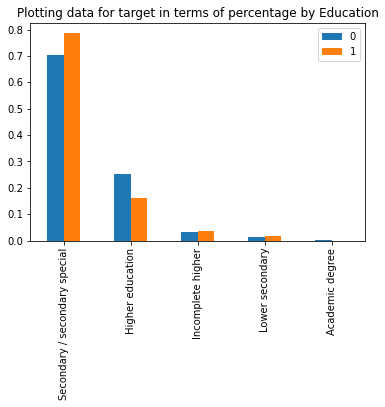

In [334]:
df = pd.DataFrame()
df['0']= ((train0['name_education_type'].value_counts())/len(train0))
df['1']= ((train1['name_education_type'].value_counts())/len(train1))
df.plot.bar()
plt.title('Plotting data for target in terms of percentage by Education')
plt.show()

5. Region_Rating_Client with a value of 2 has a higher percentage of default than other categories.


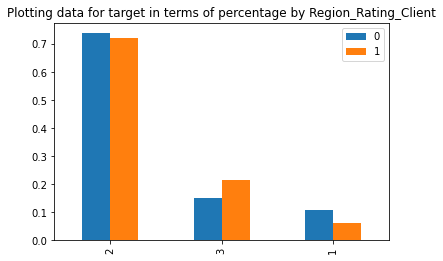

In [335]:
df = pd.DataFrame()
df['0']= ((train0['region_rating_client'].value_counts())/len(train0))
df['1']= ((train1['region_rating_client'].value_counts())/len(train1))
df.plot.bar()
plt.title('Plotting data for target in terms of percentage by Region_Rating_Client')
plt.show()

6. Single and Civil Marriage individuals have a higher percentage of defaults, while Married and Widows have lower percentage.

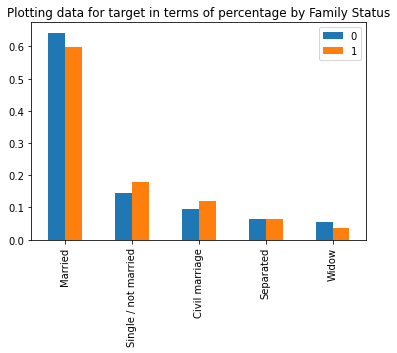

In [336]:
df = pd.DataFrame()
df['0']= ((train0['name_family_status'].value_counts())/len(train0))
df['1']= ((train1['name_family_status'].value_counts())/len(train1))
df.plot.bar()
plt.title('Plotting data for target in terms of percentage by Family Status')
plt.show()

7. While the number of Samples is higher among females, the proportion of defaulters is higher among males.

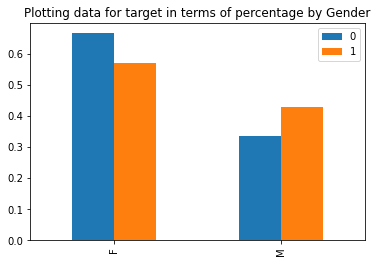

In [337]:
df = pd.DataFrame()
df['0']= ((train0['code_gender'].value_counts())/len(train0))
df['1']= ((train1['code_gender'].value_counts())/len(train1))
df.plot.bar()
plt.title('Plotting data for target in terms of percentage by Gender')
plt.show()

8. The Default Rate for low-skilled labourers and Unknown organization type (after removal of pensioners) is very high. However, these variables have few samples and hence they do not show up in the visualizations based on counts. A Similar case is observed for unemployed and Maternity Leave income types.

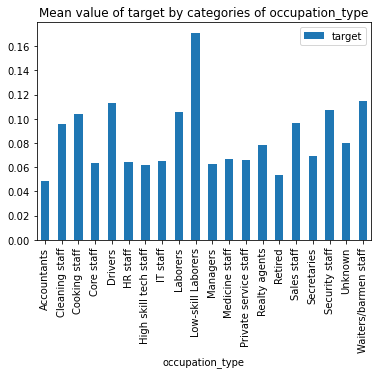

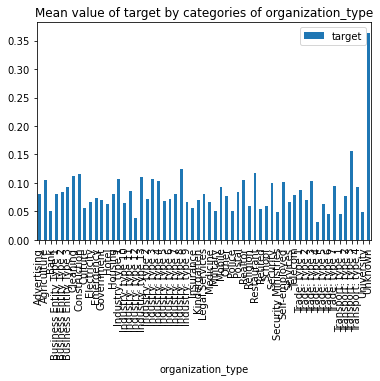

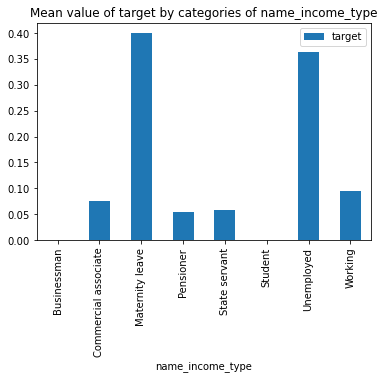

In [338]:
for column in ["occupation_type", "organization_type","name_income_type"] : 
    pd.pivot_table(data = apdata, index = column, values = "target", aggfunc = 'mean').plot(kind = 'bar')
    plt.title("Mean value of target by categories of " + column)
    plt.show()

**5.2 Numeric Variables:**
    1. Defaulting entries have a lower rating of ext_source_2 and ext_source_3.

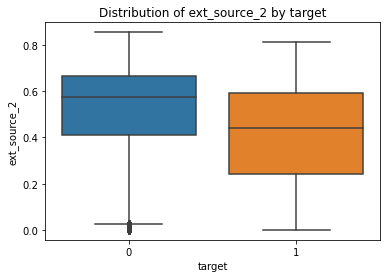

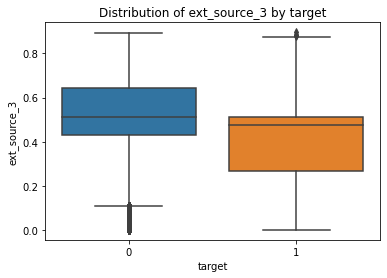

In [339]:
sns.boxplot(data = apdata, y = 'ext_source_2', x = "target")
plt.title("Distribution of ext_source_2 by target")
plt.show()
sns.boxplot(data = apdata, y = 'ext_source_3', x = "target")
plt.title("Distribution of ext_source_3 by target")
plt.show()

    2. After removing negative entries of days employed, it is seen that defaulting individuals have a lower mean, median and 75th quartile of days_employed variable.

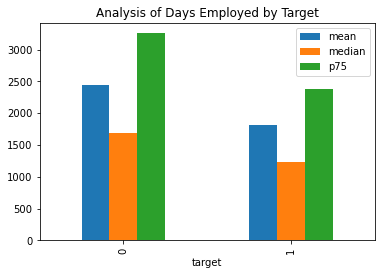

In [340]:
apdata[apdata.days_employed > 0].groupby(by = "target")["days_employed"].aggregate(["mean","median",p75]).plot(kind = 'bar')
plt.title("Analysis of Days Employed by Target")
plt.show()

3. Defaulting entries also have a lower mean, median and 75th quartile value for no. of days since last phone change.

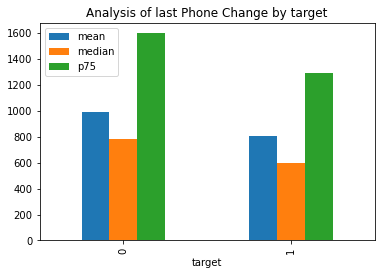

In [341]:
apdata[apdata.days_employed > 0].groupby(by = "target")["days_last_phone_change"].aggregate(["mean","median",p75]).plot(kind = 'bar')
plt.title("Analysis of last Phone Change by target")
plt.show()

4. When compared with previous appprovals, defaulting enteries have a lower mean of previous approvals.

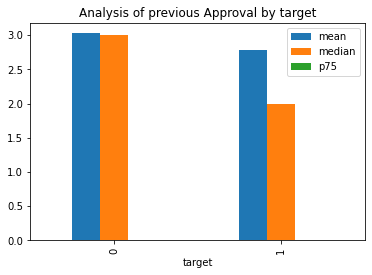

In [342]:
apdata[apdata.days_employed > 0].groupby(by = "target")["Approved"].aggregate(["mean","median",p75]).plot(kind = 'bar')
plt.title("Analysis of previous Approval by target")
plt.show()

**5.3 Insights From Correlation**

1. Highest correlation is between obs_30_cnt_social_circle and obs_60_cnt_social_circle. This is expected as they are variations of same variable.
2. Amt_goods and Amt_credit have the next highest correlation.
3. Amt_annuity also has a high correlation with amt_credit.
4. Previous approvals and cancellations have a correlation with amount of enquires to credit bureau.

***The End***